# Topics by Broader Thematic Gropus

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Map Topics to Broader Themes: Create a mapping dictionary that groups each topic into a broader theme. This mapping will allow us to aggregate topic data for each book based on theme rather than individual topic.

Calculate Theme Distributions for Each Book: Using the mapping, calculate the frequency of each broader theme for each book, creating a “theme profile” for each book.

Cluster Books by Theme Profiles: Use cosine similarity and hierarchical clustering based on these theme profiles to group books by thematic similarity.

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster

In [ ]:
# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/processed_novels_with_labels.csv'

# Load the dataset and display the first few rows to verify structure
df_sentences = pd.read_csv(dataset_path)
print("Dataset structure:")
print(df_sentences.head())

Dataset structure:
     Author               Book_Title  Chapter  \
0  Ann_Cole  Mr. Mysterious In Black        1   
1  Ann_Cole  Mr. Mysterious In Black        1   
2  Ann_Cole  Mr. Mysterious In Black        1   
3  Ann_Cole  Mr. Mysterious In Black        1   
4  Ann_Cole  Mr. Mysterious In Black        1   

                                            Sentence  topic  \
0                            Prologue H e was tired.    210   
1                                         Dog-tired.    210   
2  Amped up by pleasure mere minutes ago, his hea...     20   
3  Unfortunately, he was yanked back from the bec...     23   
4  Languid, he opened his eyes to the annoying re...     -1   

                                   topic_probability  Topic  \
0  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
1  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
2  [0.0017705  0.00184171 0.00216719 0.00173465 0...     20   
3  [0.00237123 0.00262983 0.00200518 0.00196397 0...   

In [ ]:
# Define noisy topics to exclude
noisy_topics_to_exclude = [-1, 76, 117, 165, 190]

# Filter the DataFrame to remove rows with noisy topics
df_filtered = df_sentences[~df_sentences['topic'].isin(noisy_topics_to_exclude)].copy()

print("Filtered dataset (no noisy topics):")
print(df_filtered.head())

Filtered dataset (no noisy topics):
     Author               Book_Title  Chapter  \
0  Ann_Cole  Mr. Mysterious In Black        1   
1  Ann_Cole  Mr. Mysterious In Black        1   
2  Ann_Cole  Mr. Mysterious In Black        1   
3  Ann_Cole  Mr. Mysterious In Black        1   
6  Ann_Cole  Mr. Mysterious In Black        1   

                                            Sentence  topic  \
0                            Prologue H e was tired.    210   
1                                         Dog-tired.    210   
2  Amped up by pleasure mere minutes ago, his hea...     20   
3  Unfortunately, he was yanked back from the bec...     23   
6  His eyes skidded over the olive-skinned, plati...      8   

                                   topic_probability  Topic  \
0  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
1  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
2  [0.0017705  0.00184171 0.00216719 0.00173465 0...     20   
3  [0.00237123 0.00262983 0.00200518 0

In [ ]:
# Aggregate topic data by 'Book_Title' and 'topic' to create the topic distribution matrix
# This counts the occurrences of each topic per book
df_topic_distribution = df_filtered.groupby(['Book_Title', 'topic']).size().unstack(fill_value=0)

print("Topic distribution matrix by book:")
print(df_topic_distribution.head())

Topic distribution matrix by book:
topic                                  0    1    2    3    4    5    6    \
Book_Title                                                                 
A Long Time Coming                     224  160  106   32  311   64  263   
A Not So Meet Cute                     206  222   87   44  243   84  108   
Ache for You                           191   74   79   41  175   84   95   
An Accidental Date with a Billionaire  104   50   22   22  142   20   22   
Bad Boss                               251   44   36   35  128   47   14   

topic                                   7    8    9    ...  206  207  208  \
Book_Title                                             ...                  
A Long Time Coming                     1453   56   21  ...    2    0    2   
A Not So Meet Cute                      416   49  149  ...    3    1    6   
Ache for You                            345   42   32  ...    5    1    3   
An Accidental Date with a Billionaire   111   2

In [ ]:
import os

# Define the folder path
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the topic distribution matrix to the specified folder
df_topic_distribution.to_csv(os.path.join(folder_path, 'topic_distribution_matrix_by_book.csv'))

In [ ]:
import os
import pandas as pd

# Define dataset path
dataset_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/processed_novels_with_labels.csv'

# Load the dataset
df_sentences = pd.read_csv(dataset_path)
print("Initial dataset structure:")
print(df_sentences.head())

# Define noisy topics to exclude
noisy_topics_to_exclude = [-1, 76, 117, 165, 190]

# Filter the DataFrame to remove rows with noisy topics
df_filtered = df_sentences[~df_sentences['topic'].isin(noisy_topics_to_exclude)].copy()
print("\nFiltered dataset (no noisy topics):")
print(df_filtered.head())

# Aggregate topic data by 'Book_Title' and 'topic' to create the topic distribution matrix
df_topic_distribution = df_filtered.groupby(['Book_Title', 'topic']).size().unstack(fill_value=0)
print("\nTopic distribution matrix by book:")
print(df_topic_distribution.head())

# Reset index for merging labels
df_topic_distribution = df_topic_distribution.reset_index()
print("\nTopic distribution matrix with reset index:")
print(df_topic_distribution.head())

# Extract unique topic-label pairs
topic_labels = df_sentences[['topic', 'Label']].drop_duplicates().set_index('topic')
print("\nUnique topic-label pairs:")
print(topic_labels.head())

# Create a dictionary for renaming topics to their labels
topic_label_dict = topic_labels['Label'].to_dict()
print("\nTopic label dictionary (sample):")
print(dict(list(topic_label_dict.items())[:5]))  # Print first 5 entries for brevity

# Add topic labels to the matrix by renaming the columns
df_topic_distribution_with_labels = df_topic_distribution.rename(columns=topic_label_dict)
print("\nTopic distribution matrix with labels added:")
print(df_topic_distribution_with_labels.head())

# Define folder path and create it if it doesn't exist
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'
os.makedirs(folder_path, exist_ok=True)
print(f"\nFolder '{folder_path}' is ready.")

# Define the output file path
output_path = os.path.join(folder_path, 'topic_distribution_matrix_by_book_with_topics_labels.csv')

# Save the topic distribution matrix with labels to the specified path
df_topic_distribution_with_labels.to_csv(output_path, index=False)
print(f"\nTopic distribution matrix with labels saved to: {output_path}")

# Verify by loading the saved file
df_loaded = pd.read_csv(output_path)
print("\nLoaded DataFrame from saved CSV:")
print(df_loaded.head())

Initial dataset structure:
     Author               Book_Title  Chapter  \
0  Ann_Cole  Mr. Mysterious In Black        1   
1  Ann_Cole  Mr. Mysterious In Black        1   
2  Ann_Cole  Mr. Mysterious In Black        1   
3  Ann_Cole  Mr. Mysterious In Black        1   
4  Ann_Cole  Mr. Mysterious In Black        1   

                                            Sentence  topic  \
0                            Prologue H e was tired.    210   
1                                         Dog-tired.    210   
2  Amped up by pleasure mere minutes ago, his hea...     20   
3  Unfortunately, he was yanked back from the bec...     23   
4  Languid, he opened his eyes to the annoying re...     -1   

                                   topic_probability  Topic  \
0  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
1  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...    210   
2  [0.0017705  0.00184171 0.00216719 0.00173465 0...     20   
3  [0.00237123 0.00262983 0.00200518 0.00196397

In [ ]:
# Calculate the correlation matrix for the topic columns (excluding 'Book_Title')
correlation_matrix = df_topic_distribution_with_labels.drop(columns=['Book_Title']).corr()

# Display the correlation matrix to identify relationships between themes
print("Topic Correlation Matrix:")
print(correlation_matrix)

# Save correlation matrix as CSV for external analysis if needed
correlation_output_path = os.path.join(folder_path, 'topic_correlation_matrix.csv')
correlation_matrix.to_csv(correlation_output_path)
print(f"\nTopic correlation matrix saved to: {correlation_output_path}")

Topic Correlation Matrix:
topic                                     Laughter and Joy  \
topic                                                        
Laughter and Joy                                  1.000000   
Romantic Meals and Dates                          0.414479   
Bedroom and Cozy Blankets                         0.562636   
Luxury Cars and Driving                           0.675986   
Inner Conflicts and Doubts                        0.447404   
...                                                    ...   
Charity and Giving                               -0.003366   
Kicking and Martial Arts                          0.341385   
Moments of Comfort and Relaxation                 0.360058   
Cozy Romantic Settings (like Fireplaces)          0.024435   
Dealing with Doubts and Uncertainty               0.205694   

topic                                     Romantic Meals and Dates  \
topic                                                                
Laughter and Joy           

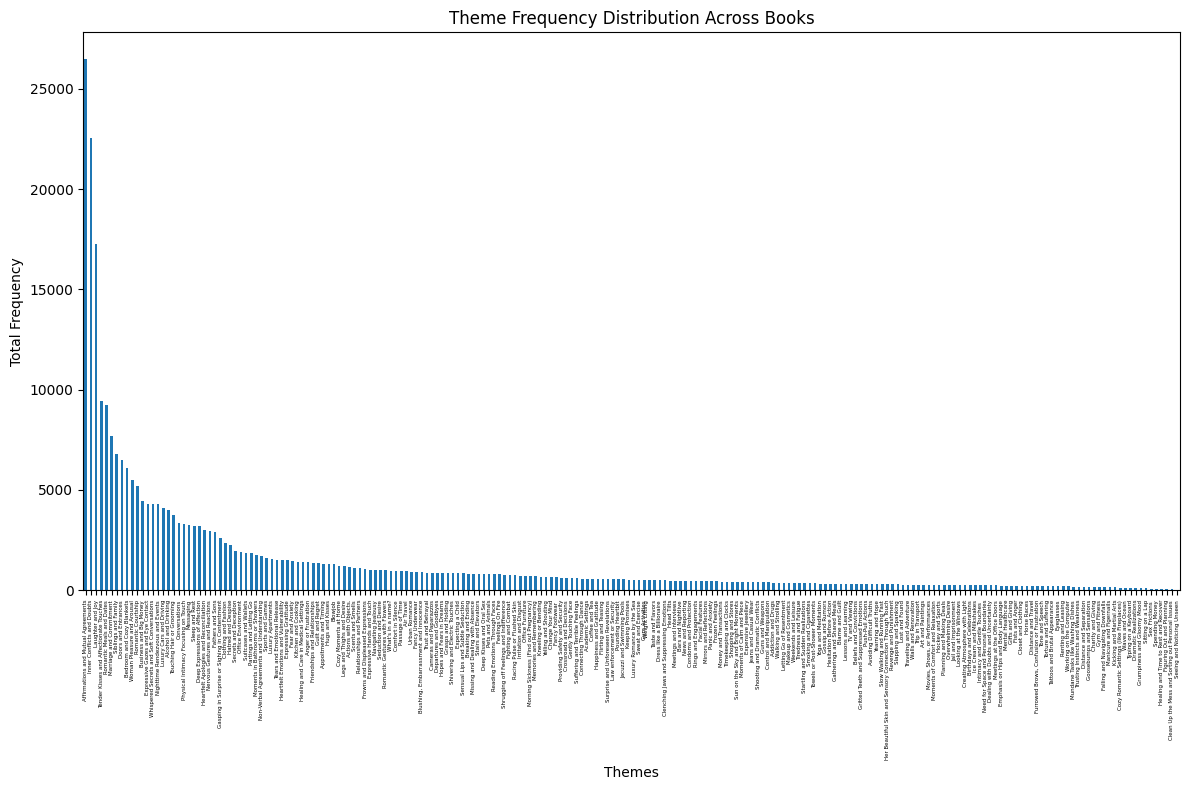

In [ ]:
import matplotlib.pyplot as plt

# Sum the frequency of each theme across all books to get total counts per theme
theme_frequency = df_topic_distribution_with_labels.drop(columns=['Book_Title']).sum().sort_values(ascending=False)

# Plot the frequency distribution
plt.figure(figsize=(12, 8))
theme_frequency.plot(kind='bar', title='Theme Frequency Distribution Across Books')
plt.xlabel('Themes')
plt.ylabel('Total Frequency')
plt.xticks(rotation=90, fontsize=4)  # Adjust fontsize here
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total frequency and variance for each theme
theme_total_frequency = df_topic_distribution_with_labels.drop(columns=['Book_Title']).sum()
theme_variance = df_topic_distribution_with_labels.drop(columns=['Book_Title']).var()

# Combine the results into a DataFrame for easier sorting and ranking
theme_importance_df = pd.DataFrame({
    'Total_Frequency': theme_total_frequency,
    'Variance': theme_variance
}).sort_values(by=['Total_Frequency', 'Variance'], ascending=[False, False])

# Display the ranking of themes by frequency and variance
print(theme_importance_df)

                                                   Total_Frequency  \
topic                                                                
Affirmations and Mutual Agreements                           26493   
Inner Conflicts and Doubts                                   22565   
Laughter and Joy                                             17242   
Tender Kisses and Affectionate Touches                        9455   
Romantic Meals and Dates                                      9252   
...                                                            ...   
Spending Money                                                  83   
Healing and Time to Rest and Recover                            81   
Figuring Out and Planning                                       53   
Clean Up the Mess and Sorting out Personal Issues               38   
Seeing and Noticing Unseen                                      19   

                                                       Variance  
topic                  

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Calculate total frequency and variance for each theme
theme_total_frequency = df_topic_distribution_with_labels.drop(columns=['Book_Title']).sum()
theme_variance = df_topic_distribution_with_labels.drop(columns=['Book_Title']).var()

# Combine the results into a DataFrame for easier sorting and ranking
theme_importance_df = pd.DataFrame({
    'Total_Frequency': theme_total_frequency,
    'Variance': theme_variance
})

# Adding rank columns based on frequency and variance individually
theme_importance_df['Frequency_Rank'] = theme_importance_df['Total_Frequency'].rank(ascending=False)
theme_importance_df['Variance_Rank'] = theme_importance_df['Variance'].rank(ascending=False)

# Sorting by both criteria to provide an ordered view
theme_importance_df = theme_importance_df.sort_values(by=['Frequency_Rank', 'Variance_Rank'])

# Selecting relevant columns for the final analysis table
theme_importance_table = theme_importance_df[['Total_Frequency', 'Variance', 'Frequency_Rank', 'Variance_Rank']]

# Displaying the ranking of themes by frequency and variance
print("Theme Importance Table for Analysis Report:")
print(theme_importance_table)

Theme Importance Table for Analysis Report:
                                                   Total_Frequency  \
topic                                                                
Affirmations and Mutual Agreements                           26493   
Inner Conflicts and Doubts                                   22565   
Laughter and Joy                                             17242   
Tender Kisses and Affectionate Touches                        9455   
Romantic Meals and Dates                                      9252   
...                                                            ...   
Spending Money                                                  83   
Healing and Time to Rest and Recover                            81   
Figuring Out and Planning                                       53   
Clean Up the Mess and Sorting out Personal Issues               38   
Seeing and Noticing Unseen                                      19   

                                             

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Calculate total frequency and variance for each theme
theme_total_frequency = df_topic_distribution_with_labels.drop(columns=['Book_Title']).sum()
theme_variance = df_topic_distribution_with_labels.drop(columns=['Book_Title']).var()

# Define adjusted thresholds
frequency_threshold_adjusted = theme_total_frequency.quantile(0.65)  # 65th percentile for high frequency
variance_threshold_adjusted = theme_variance.quantile(0.30)          # 30th percentile for low variance

# Identifying themes that meet either high frequency or low variance criteria individually
# High Frequency Only
high_frequency_themes = theme_total_frequency[theme_total_frequency > frequency_threshold_adjusted].index
high_frequency_df = pd.DataFrame({
    'Total_Frequency': theme_total_frequency[high_frequency_themes],
    'Variance': theme_variance[high_frequency_themes]
}).sort_values(by='Total_Frequency', ascending=False)

# Low Variance Only
low_variance_themes = theme_variance[theme_variance < variance_threshold_adjusted].index
low_variance_df = pd.DataFrame({
    'Total_Frequency': theme_total_frequency[low_variance_themes],
    'Variance': theme_variance[low_variance_themes]
}).sort_values(by='Variance')

# Display the dataframes for high frequency and low variance themes
print("High Frequency Themes:")
print(high_frequency_df)
print("\nLow Variance Themes:")
print(low_variance_df)

High Frequency Themes:
                                        Total_Frequency      Variance
topic                                                                
Affirmations and Mutual Agreements                26493  62616.006044
Inner Conflicts and Doubts                        22565   9800.683150
Laughter and Joy                                  17242   9121.397985
Tender Kisses and Affectionate Touches             9455   1764.718864
Romantic Meals and Dates                           9252   3451.659890
...                                                 ...           ...
Hopes and Fears in Dreams                           868     50.158974
Shivering and Electric Touches                      867    106.558242
Grasps and Holding                                  867     44.635165
Expecting a Child                                   861    116.546154
Sensual Lips and Subtle Seduction                   855     66.142857

[74 rows x 2 columns]

Low Variance Themes:
                      

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Define the number of top themes to extract for each book
top_n = 10

# Exclude 'Book_Title' column for numeric theme data
theme_data_numeric_only = df_topic_distribution_with_labels.drop(columns=['Book_Title'])

# Function to get top N themes for each book
top_themes_by_book = theme_data_numeric_only.apply(lambda row: row.nlargest(top_n).index.tolist(), axis=1)

# Creating a DataFrame to associate each book with its top themes
top_themes_df = pd.DataFrame({
    'Book_Title': df_topic_distribution_with_labels['Book_Title'],
    'Top_Themes': top_themes_by_book
})

# Display the result
print("Top Themes by Book:")
print(top_themes_df)

Top Themes by Book:
                                Book_Title  \
0                       A Long Time Coming   
1                       A Not So Meet Cute   
2                             Ache for You   
3    An Accidental Date with a Billionaire   
4                                 Bad Boss   
..                                     ...   
100                                Trouble   
101                           Twisted Lies   
102                           Twisted Love   
103                                 Tycoon   
104              Unmasking the Billionaire   

                                            Top_Themes  
0    [Affirmations and Mutual Agreements, Inner Con...  
1    [Affirmations and Mutual Agreements, Inner Con...  
2    [Affirmations and Mutual Agreements, Laughter ...  
3    [Inner Conflicts and Doubts, Affirmations and ...  
4    [Laughter and Joy, Affirmations and Mutual Agr...  
..                                                 ...  
100  [Inner Conflicts and Do

In [ ]:
import pandas as pd

# Assuming df_topic_distribution_with_labels is already loaded in your environment

# Define the number of top themes to extract for each book
top_n = 10

# Exclude 'Book_Title' column for numeric theme data
theme_data_numeric_only = df_topic_distribution_with_labels.drop(columns=['Book_Title'])

# Function to get top N themes for each book
top_themes_by_book = theme_data_numeric_only.apply(lambda row: row.nlargest(top_n).index.tolist(), axis=1)

# Creating a DataFrame to associate each book with its top themes
top_themes_df = pd.DataFrame({
    'Book_Title': df_topic_distribution_with_labels['Book_Title'],
    'Top_Themes': top_themes_by_book
})

# Define the folder path where the output will be saved
folder_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis'

# Define the full output path for the CSV file
output_path = f"{folder_path}/top_themes_by_book.csv"

# Save the DataFrame to CSV
top_themes_df.to_csv(output_path, index=False)
print(f"Top themes by book saved to: {output_path}")

Top themes by book saved to: /content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/topics_correlation_analysis/top_themes_by_book.csv


In [ ]:
# Define a dictionary mapping each topic to its broader theme
topic_to_theme = {
    # Happy Emotions, Calm and Peace
    0: 'Happy Emotions, Calm and Peace', 201: 'Happy Emotions, Calm and Peace', 84: 'Happy Emotions, Calm and Peace',
    121: 'Happy Emotions, Calm and Peace', 179: 'Happy Emotions, Calm and Peace', 183: 'Happy Emotions, Calm and Peace', 213: 'Happy Emotions, Calm and Peace',

    # Inner Conflicts and Decisions
    4: 'Inner Conflicts and Decisions', 215: 'Inner Conflicts and Decisions', 155: 'Inner Conflicts and Decisions',
    204: 'Inner Conflicts and Decisions', 178: 'Inner Conflicts and Decisions', 141: 'Inner Conflicts and Decisions',
    157: 'Inner Conflicts and Decisions', 164: 'Inner Conflicts and Decisions', 101: 'Inner Conflicts and Decisions',
    120: 'Inner Conflicts and Decisions', 143: 'Inner Conflicts and Decisions', 148: 'Inner Conflicts and Decisions',
    203: 'Inner Conflicts and Decisions', 146: 'Inner Conflicts and Decisions',

    # Vulnerability, Anxiety and Fear
    31: 'Vulnerability, Anxiety and Fear', 38: 'Vulnerability, Anxiety and Fear', 46: 'Vulnerability, Anxiety and Fear',
    131: 'Vulnerability, Anxiety and Fear', 67: 'Vulnerability, Anxiety and Fear', 210: 'Vulnerability, Anxiety and Fear',

    # Anger and Frustration
    37: 'Anger and Frustration', 152: 'Anger and Frustration', 191: 'Anger and Frustration', 174: 'Anger and Frustration',
    42: 'Anger and Frustration', 66: 'Anger and Frustration', 138: 'Anger and Frustration', 113: 'Anger and Frustration',
    119: 'Anger and Frustration',

    # Guilt and Betrayal
    49: 'Guilt and Betrayal', 126: 'Guilt and Betrayal', 46: 'Guilt and Betrayal', 130: 'Guilt and Betrayal',

    # Commitment and Engagement
    6: 'Commitment and Engagement', 112: 'Commitment and Engagement',

    # Highly Explicit Erotic
    13: 'Highly Explicit Erotic', 43: 'Highly Explicit Erotic', 52: 'Highly Explicit Erotic', 53: 'Highly Explicit Erotic',
    18: 'Highly Explicit Erotic', 102: 'Highly Explicit Erotic', 182: 'Highly Explicit Erotic', 198: 'Highly Explicit Erotic',
    199: 'Highly Explicit Erotic', 110: 'Highly Explicit Erotic',

    # Softer Erotic
    8: 'Softer Erotic', 23: 'Softer Erotic', 30: 'Softer Erotic', 41: 'Softer Erotic', 65: 'Softer Erotic',
    74: 'Softer Erotic', 125: 'Softer Erotic', 40: 'Softer Erotic', 10: 'Softer Erotic', 133: 'Softer Erotic',
    55: 'Softer Erotic', 193: 'Softer Erotic', 45: 'Softer Erotic', 59: 'Softer Erotic', 200: 'Softer Erotic',

    # Courtship and Flirting
    1: 'Courtship and Flirting', 85: 'Courtship and Flirting', 86: 'Courtship and Flirting', 71: 'Courtship and Flirting',
    166: 'Courtship and Flirting', 167: 'Courtship and Flirting', 168: 'Courtship and Flirting', 169: 'Courtship and Flirting',
    205: 'Courtship and Flirting', 72: 'Courtship and Flirting',

    # Cozy Romantic Settings
    214: 'Cozy Romantic Settings', 77: 'Cozy Romantic Settings', 158: 'Cozy Romantic Settings', 161: 'Cozy Romantic Settings',
    78: 'Cozy Romantic Settings', 123: 'Cozy Romantic Settings', 135: 'Cozy Romantic Settings', 107: 'Cozy Romantic Settings',

    # Communication
    14: 'Communication', 11: 'Communication', 106: 'Communication', 7: 'Communication', 36: 'Communication',
    10: 'Communication', 64: 'Communication', 61: 'Communication',

    # Domestic Environment
    2: 'Domestic Environment', 5: 'Domestic Environment', 76: 'Domestic Environment', 173: 'Domestic Environment',
    25: 'Domestic Environment', 28: 'Domestic Environment', 163: 'Domestic Environment', 22: 'Domestic Environment',
    136: 'Domestic Environment', 88: 'Domestic Environment', 118: 'Domestic Environment', 132: 'Domestic Environment',

    # Clothes and Appearance
    26: 'Clothes and Appearance', 145: 'Clothes and Appearance', 142: 'Clothes and Appearance', 154: 'Clothes and Appearance',
    92: 'Clothes and Appearance', 69: 'Clothes and Appearance',

    # Sensory Experiences
    55: 'Sensory Experiences', 57: 'Sensory Experiences', 73: 'Sensory Experiences', 139: 'Sensory Experiences',
    193: 'Sensory Experiences', 54: 'Sensory Experiences', 210: 'Sensory Experiences',

    # Facial Expressions
    66: 'Facial Expressions', 69: 'Facial Expressions', 73: 'Facial Expressions', 138: 'Facial Expressions',

    # Luxury Living
    33: 'Luxury Living', 185: 'Luxury Living', 115: 'Luxury Living', 78: 'Luxury Living', 211: 'Luxury Living',
    26: 'Luxury Living', 81: 'Luxury Living', 104: 'Luxury Living', 144: 'Luxury Living', 154: 'Luxury Living',
    58: 'Luxury Living', 82: 'Luxury Living', 145: 'Luxury Living', 142: 'Luxury Living', 208: 'Luxury Living',
    47: 'Luxury Living', 44: 'Luxury Living', 189: 'Luxury Living', 172: 'Luxury Living', 176: 'Luxury Living', 3: 'Luxury Living',

    # Financial and Professional Aspects
    9: 'Financial and Professional Aspects', 109: 'Financial and Professional Aspects', 185: 'Financial and Professional Aspects',
    21: 'Financial and Professional Aspects', 29: 'Financial and Professional Aspects', 111: 'Financial and Professional Aspects',
    17: 'Financial and Professional Aspects', 98: 'Financial and Professional Aspects', 100: 'Financial and Professional Aspects',
    181: 'Financial and Professional Aspects', 206: 'Financial and Professional Aspects', 186: 'Financial and Professional Aspects',
    151: 'Financial and Professional Aspects', 156: 'Financial and Professional Aspects',

    # Conflict and Danger
    63: 'Conflict and Danger', 152: 'Conflict and Danger', 99: 'Conflict and Danger', 124: 'Conflict and Danger',
    197: 'Conflict and Danger', 192: 'Conflict and Danger', 140: 'Conflict and Danger', 188: 'Conflict and Danger',
    147: 'Conflict and Danger',

    # Sweat and Exercise
    108: 'Sweat and Exercise', 196: 'Sweat and Exercise', 97: 'Sweat and Exercise', 212: 'Sweat and Exercise',
    162: 'Sweat and Exercise', 153: 'Sweat and Exercise', 32: 'Sweat and Exercise', 153: 'Sweat and Exercise', 87: 'Sweat and Exercise',

    # Addictions and Vices
    127: 'Addictions and Vices', 149: 'Addictions and Vices', 15: 'Addictions and Vices', 96: 'Addictions and Vices',

    # Brutal Hero
    134: 'Brutal Hero', 202: 'Brutal Hero',

    # Medical Care
    56: 'Medical Care', 207: 'Medical Care', 184: 'Medical Care', 122: 'Medical Care',

    # Children and Pregnancy
    150: 'Children and Pregnancy',

    # Memories and Remembrance
    75: 'Memories and Remembrance', 39: 'Memories and Remembrance', 100: 'Memories and Remembrance',

    # Technology and Modern Communication
    27: 'Technology and Modern Communication', 214: 'Technology and Modern Communication',
    186: 'Technology and Modern Communication', 151: 'Technology and Modern Communication',

    # Personal Development and Growth
    194: 'Personal Development and Growth', 184: 'Personal Development and Growth', 122: 'Personal Development and Growth',
    20: 'Personal Development and Growth', 207: 'Personal Development and Growth',

    # Conflict Resolution and Sudden Realizations
    50: 'Conflict Resolution and Sudden Realizations', 177: 'Conflict Resolution and Sudden Realizations',
    49: 'Conflict Resolution and Sudden Realizations', 130: 'Conflict Resolution and Sudden Realizations',
    187: 'Conflict Resolution and Sudden Realizations', 175: 'Conflict Resolution and Sudden Realizations',
    137: 'Conflict Resolution and Sudden Realizations', 160: 'Conflict Resolution and Sudden Realizations',
    62: 'Conflict Resolution and Sudden Realizations', 137: 'Conflict Resolution and Sudden Realizations',

    # Separation and Goodbyes
    48: 'Separation and Goodbyes', 70: 'Separation and Goodbyes', 180: 'Separation and Goodbyes',
    195: 'Separation and Goodbyes', 129: 'Separation and Goodbyes',

    # Social Life (Friends and Relatives)
    24: 'Social Life (Friends and Relatives)', 35: 'Social Life (Friends and Relatives)',
    34: 'Social Life (Friends and Relatives)', 89: 'Social Life (Friends and Relatives)',
    209: 'Social Life (Friends and Relatives)',

    # Sports and Physical Activities
    32: 'Sports and Physical Activities', 171: 'Sports and Physical Activities', 212: 'Sports and Physical Activities',
    108: 'Sports and Physical Activities', 196: 'Sports and Physical Activities', 97: 'Sports and Physical Activities',

    # Leisure and Entertainment
    170: 'Leisure and Entertainment', 114: 'Leisure and Entertainment', 128: 'Leisure and Entertainment',

    # Challenges and Enemies
    203: 'Challenges and Enemies', 159: 'Challenges and Enemies', 51: 'Challenges and Enemies', 46: 'Challenges and Enemies'
}

In [ ]:
# Import necessary libraries
import pandas as pd

# Assuming df_topic_distribution is already defined as in the previous steps
# Initialize df_theme_distribution with zeroes, using the same index as df_topic_distribution (i.e., book titles)
# and columns based on unique themes from topic_to_theme values
unique_themes = list(set(topic_to_theme.values()))
df_theme_distribution = pd.DataFrame(0, index=df_topic_distribution.index, columns=unique_themes)

# Aggregate each topic into its broader theme
for topic_col in df_topic_distribution.columns:
    if topic_col in topic_to_theme:
        theme = topic_to_theme[topic_col]
        df_theme_distribution[theme] += df_topic_distribution[topic_col]

# Display the theme distribution to verify that themes have non-zero values
print("Aggregated theme distribution:")
print(df_theme_distribution.head())

Aggregated theme distribution:
                                       Guilt and Betrayal  \
Book_Title                                                  
A Long Time Coming                                      7   
A Not So Meet Cute                                     10   
Ache for You                                            1   
An Accidental Date with a Billionaire                   2   
Bad Boss                                                2   

                                       Domestic Environment  \
Book_Title                                                    
A Long Time Coming                                      304   
A Not So Meet Cute                                      248   
Ache for You                                            229   
An Accidental Date with a Billionaire                    76   
Bad Boss                                                120   

                                       Memories and Remembrance  \
Book_Title                      

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calculate cosine similarity between books based on theme distribution
cosine_sim_matrix = cosine_similarity(df_theme_distribution)

# Convert to DataFrame for easier interpretation
similarity_df = pd.DataFrame(cosine_sim_matrix, index=df_theme_distribution.index, columns=df_theme_distribution.index)

print("Cosine similarity matrix:")
print(similarity_df.head())

Cosine similarity matrix:
Book_Title                             A Long Time Coming  A Not So Meet Cute  \
Book_Title                                                                      
A Long Time Coming                               1.000000            0.887442   
A Not So Meet Cute                               0.887442            1.000000   
Ache for You                                     0.920905            0.942137   
An Accidental Date with a Billionaire            0.808160            0.945047   
Bad Boss                                         0.844577            0.937802   

Book_Title                             Ache for You  \
Book_Title                                            
A Long Time Coming                         0.920905   
A Not So Meet Cute                         0.942137   
Ache for You                               1.000000   
An Accidental Date with a Billionaire      0.930779   
Bad Boss                                   0.940878   

Book_Title          

In [ ]:
# Perform hierarchical clustering using cosine distance (1 - cosine similarity)
linkage_matrix = linkage(1 - cosine_sim_matrix, method='ward')

# Set a threshold to define clusters, which can be adjusted based on analysis requirements
threshold = 0.5  # Adjust threshold based on desired cluster granularity
cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')

# Add the cluster labels to the theme distribution DataFrame
df_theme_distribution['Cluster_Label'] = cluster_labels

print("Theme distribution with cluster labels:")
print(df_theme_distribution[['Cluster_Label']].head())

Theme distribution with cluster labels:
                                       Cluster_Label
Book_Title                                          
A Long Time Coming                                 1
A Not So Meet Cute                                 9
Ache for You                                       4
An Accidental Date with a Billionaire             11
Bad Boss                                           6


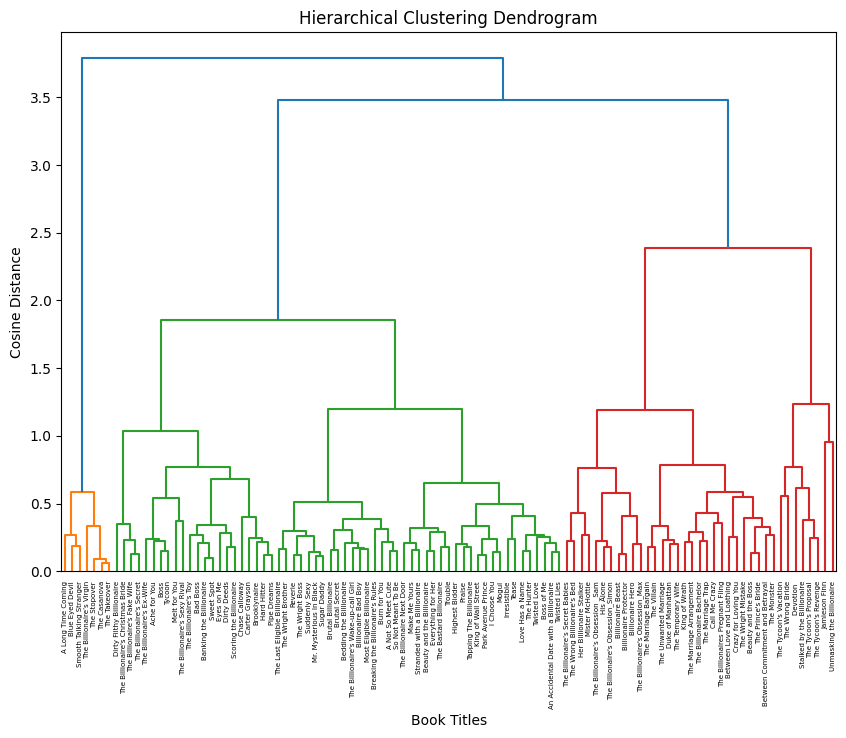

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df_theme_distribution.index, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Book Titles")
plt.ylabel("Cosine Distance")
plt.show()

In [ ]:
# Save theme distribution with cluster labels for manual inspection or further analysis
output_path = '/content/drive/MyDrive/BERTTopic_Models/theme_clusters_with_labels.csv'
df_theme_distribution.to_csv(output_path)

print(f"Clustered theme distribution saved to {output_path}")

Clustered theme distribution saved to /content/drive/MyDrive/BERTTopic_Models/theme_clusters_with_labels.csv


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load the theme distribution data
df_theme_clusters = pd.read_csv('/content/drive/MyDrive/BERTTopic_Models/theme_clusters_with_labels.csv')

# Set Book_Title as the index for easy access to similarity matrix
df_theme_clusters.set_index('Book_Title', inplace=True)

# Remove the Cluster_Label column for similarity calculations
df_themes_only = df_theme_clusters.drop(columns=['Cluster_Label'])

# Calculate cosine similarity between books
cosine_sim_matrix = cosine_similarity(df_themes_only)

# Convert cosine similarity matrix to DataFrame for easier interpretation
similarity_df = pd.DataFrame(cosine_sim_matrix, index=df_themes_only.index, columns=df_themes_only.index)

# Display similarity matrix
print("Cosine similarity matrix:")
similarity_df.head()

Cosine similarity matrix:


Book_Title,A Long Time Coming,A Not So Meet Cute,Ache for You,An Accidental Date with a Billionaire,Bad Boss,Banking the Billionaire,Beauty and the Billionaire,Beauty and the Boss,Bedding the Billionaire,Between Commitment and Betrayal,...,The Wright Boss,The Wright Brother,The Wright Mistake,The Wrong Billionaire's Bed,The Wrong Bride,Trouble,Twisted Lies,Twisted Love,Tycoon,Unmasking the Billionaire
Book_Title,,,,,,,,,,,,,,,,,,,,,
A Long Time Coming,1.000000,0.887442,0.920905,0.808160,0.844577,0.825423,0.794629,0.798887,0.900947,0.841320,...,0.854299,0.843085,0.799233,0.742281,0.749491,0.751321,0.789860,0.806167,0.890751,0.638345
A Not So Meet Cute,0.887442,1.000000,0.942137,0.945047,0.937802,0.927136,0.968364,0.916893,0.949110,0.943018,...,0.934962,0.943378,0.889376,0.904466,0.852615,0.939127,0.939335,0.933160,0.934982,0.802641
Ache for You,0.920905,0.942137,1.000000,0.930779,0.940878,0.929188,0.893668,0.908254,0.966535,0.921120,...,0.936811,0.940127,0.911151,0.866121,0.824700,0.907930,0.934586,0.938879,0.968496,0.770363
An Accidental Date with a Billionaire,0.808160,0.945047,0.930779,1.000000,0.924906,0.926623,0.954538,0.983798,0.957111,0.925592,...,0.965203,0.965623,0.939131,0.919916,0.861263,0.967798,0.979263,0.947426,0.958125,0.846164
Bad Boss,0.844577,0.937802,0.940878,0.924906,1.000000,0.981662,0.912834,0.875558,0.945972,0.890773,...,0.926591,0.916324,0.895298,0.869622,0.800574,0.909864,0.938749,0.937714,0.962018,0.771921


In [ ]:
output_csv_path = '/content/drive/MyDrive/BERTTopic_Models/cosine_similarity_matrix.csv'
similarity_df.to_csv(output_csv_path)
print(f"Similarity matrix successfully saved to {output_csv_path}")

Similarity matrix successfully saved to /content/drive/MyDrive/BERTTopic_Models/cosine_similarity_matrix.csv


In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Perform hierarchical clustering using cosine distance (1 - cosine similarity)
linkage_matrix = linkage(1 - cosine_sim_matrix, method='ward')

# Define a threshold to generate clusters
threshold = 0.5  # Adjust threshold based on the level of granularity needed
cluster_labels = fcluster(linkage_matrix, threshold, criterion='distance')

# Add cluster labels back to the main DataFrame
df_theme_clusters['Cluster_Label'] = cluster_labels

# Display cluster label assignments
print("Books with cluster labels:")
df_theme_clusters[['Cluster_Label']].head(105)

Books with cluster labels:


,Cluster_Label
Book_Title,
A Long Time Coming,1
A Not So Meet Cute,9
Ache for You,4
An Accidental Date with a Billionaire,11
Bad Boss,6
...,...
Trouble,10
Twisted Lies,11
Twisted Love,11


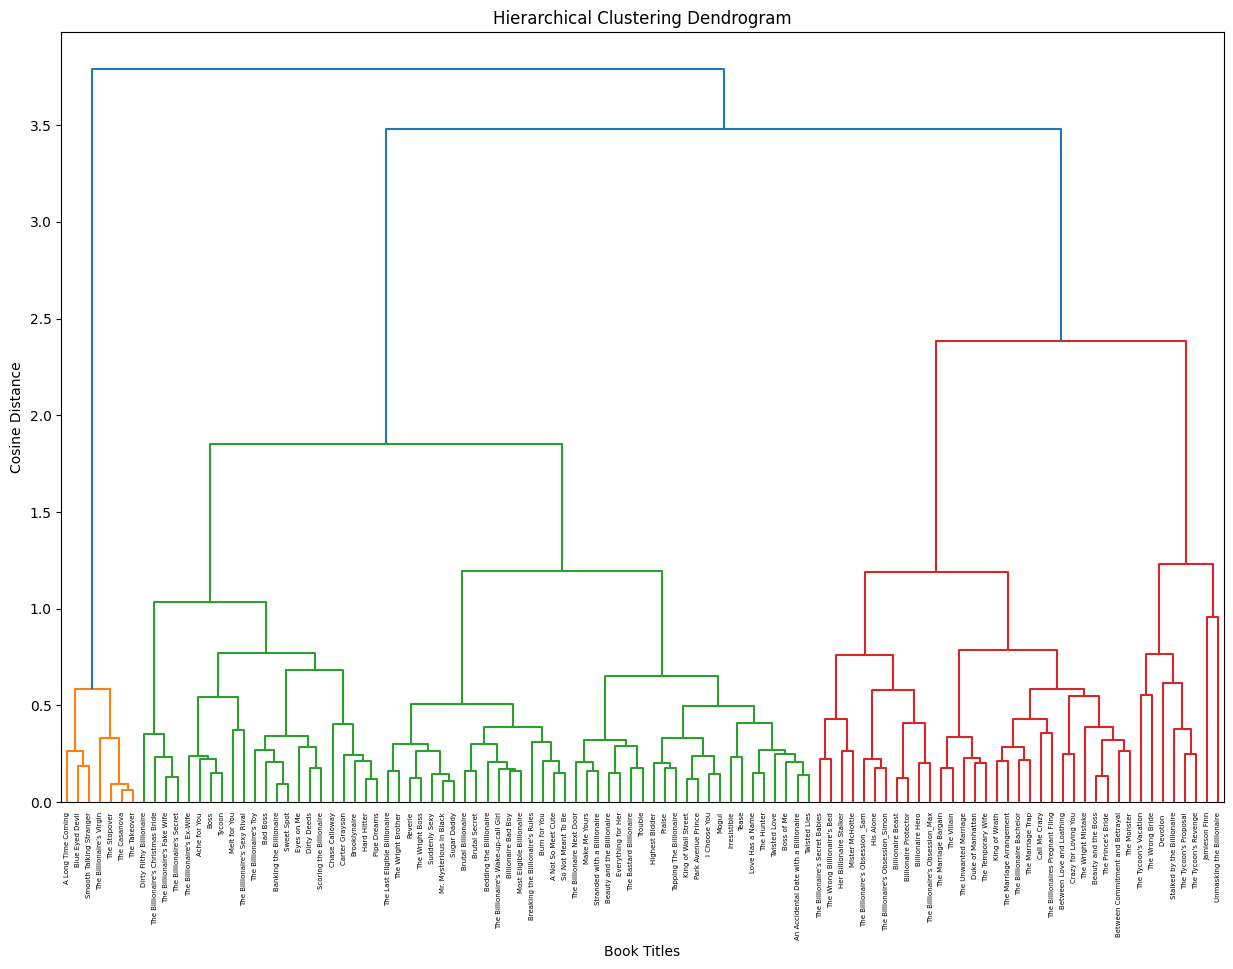

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Plot dendrogram for hierarchical clustering visualization
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=df_themes_only.index, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Book Titles")
plt.ylabel("Cosine Distance")
plt.show()

In [ ]:
# Count unique clusters and the number of books in each cluster
cluster_counts = df_theme_clusters['Cluster_Label'].value_counts().sort_index()

print("Number of clusters:", cluster_counts.shape[0])
print("Book distribution across clusters:")
print(cluster_counts)

Number of clusters: 24
Book distribution across clusters:
Cluster_Label
1      3
2      4
3      4
4      4
5      2
6      7
7      5
8      7
9     10
10     7
11    15
12     4
13     3
14     4
15     5
16     6
17     2
18     5
19     1
20     1
21     3
22     1
23     1
24     1
Name: count, dtype: int64


In [ ]:
# Calculate average theme values per cluster to identify prevalent themes
cluster_theme_means = df_theme_clusters.groupby('Cluster_Label').mean()

# Drop the Cluster_Label column if it's included in the mean calculation
if 'Cluster_Label' in cluster_theme_means.columns:
    cluster_theme_means = cluster_theme_means.drop(columns=['Cluster_Label'])

print("Average theme values per cluster:")
print(cluster_theme_means.head())

Average theme values per cluster:
               Guilt and Betrayal  Domestic Environment  \
Cluster_Label                                             
1                        7.333333                264.00   
2                        1.250000                335.50   
3                        5.250000                220.00   
4                        1.750000                128.75   
5                        5.000000                165.50   

               Memories and Remembrance  Personal Development and Growth  \
Cluster_Label                                                              
1                                 27.00                            67.00   
2                                 27.00                            57.25   
3                                 30.75                            29.00   
4                                 12.25                            22.50   
5                                 12.00                            24.50   

               Leis

In [ ]:
# Identify top 5 themes per cluster for easier labeling
top_themes_by_cluster = {}
for cluster_label in cluster_theme_means.index:
    top_themes = cluster_theme_means.loc[cluster_label].nlargest(5).index.tolist()
    top_themes_by_cluster[cluster_label] = top_themes

print("Top themes per cluster:")
for cluster, themes in top_themes_by_cluster.items():
    print(f"Cluster {cluster}: {themes}")

Top themes per cluster:
Cluster 1: ['Communication', 'Inner Conflicts and Decisions', 'Happy Emotions, Calm and Peace', 'Softer Erotic', 'Domestic Environment']
Cluster 2: ['Communication', 'Happy Emotions, Calm and Peace', 'Domestic Environment', 'Softer Erotic', 'Luxury Living']
Cluster 3: ['Communication', 'Inner Conflicts and Decisions', 'Highly Explicit Erotic', 'Softer Erotic', 'Happy Emotions, Calm and Peace']
Cluster 4: ['Communication', 'Happy Emotions, Calm and Peace', 'Inner Conflicts and Decisions', 'Softer Erotic', 'Domestic Environment']
Cluster 5: ['Communication', 'Happy Emotions, Calm and Peace', 'Domestic Environment', 'Courtship and Flirting', 'Softer Erotic']
Cluster 6: ['Communication', 'Happy Emotions, Calm and Peace', 'Inner Conflicts and Decisions', 'Highly Explicit Erotic', 'Domestic Environment']
Cluster 7: ['Communication', 'Domestic Environment', 'Happy Emotions, Calm and Peace', 'Inner Conflicts and Decisions', 'Courtship and Flirting']
Cluster 8: ['Communi

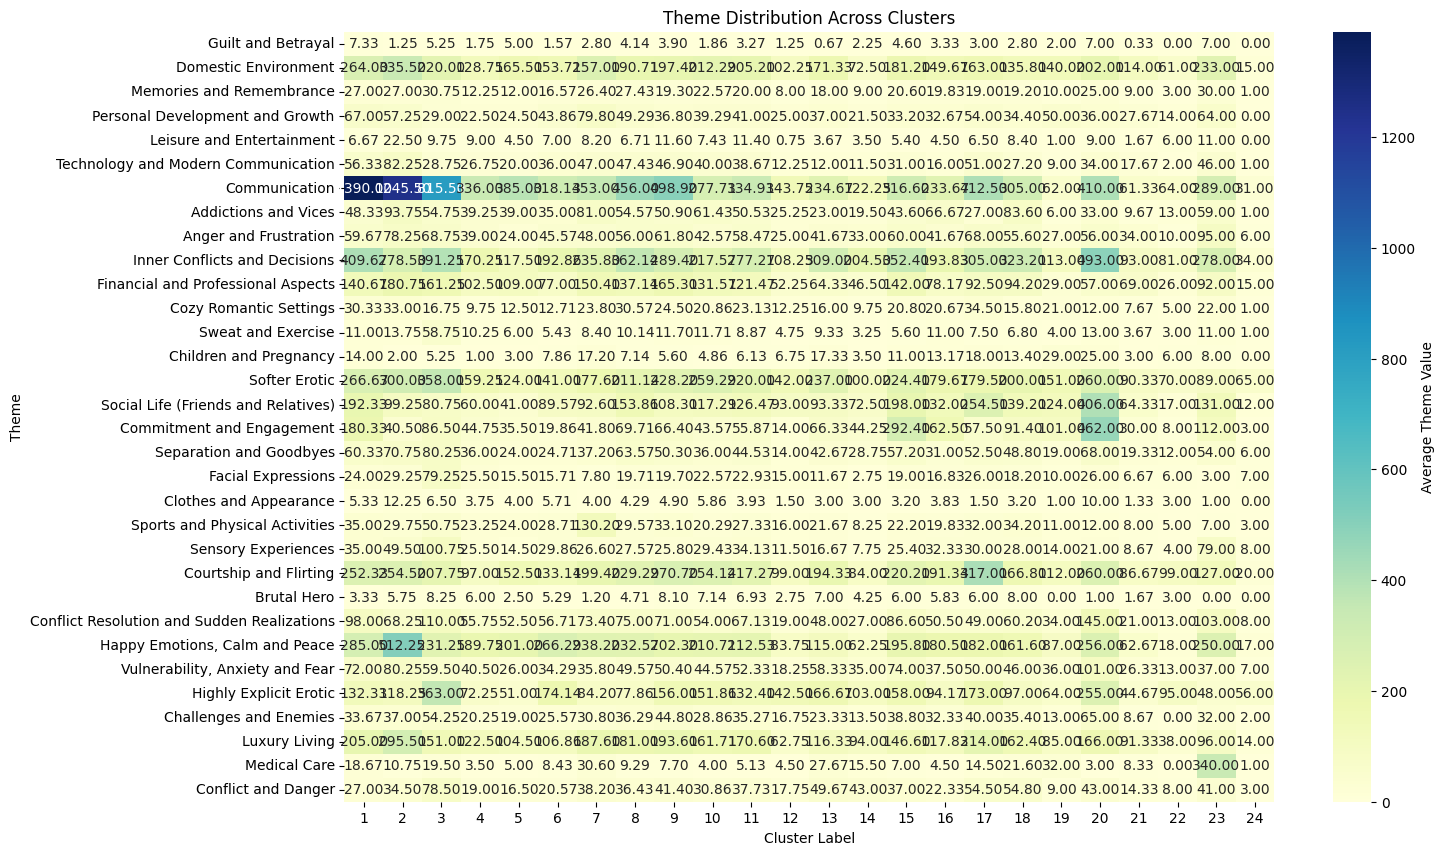

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for theme distribution across clusters
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_theme_means.T, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Average Theme Value'})
plt.title("Theme Distribution Across Clusters")
plt.xlabel("Cluster Label")
plt.ylabel("Theme")
plt.show()

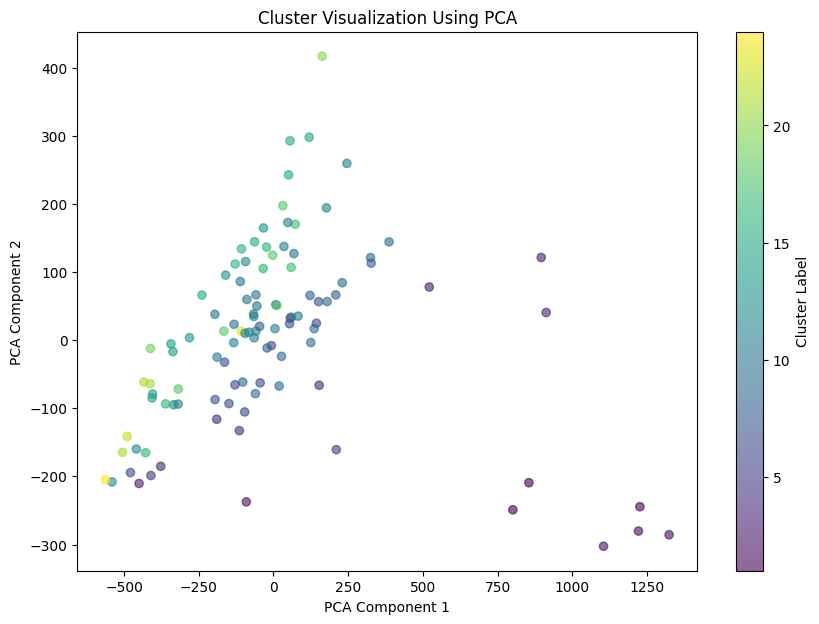

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
cluster_theme_pca = pca.fit_transform(df_theme_clusters.drop(columns=['Cluster_Label']))

# Plot PCA results for clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(cluster_theme_pca[:, 0], cluster_theme_pca[:, 1], c=df_theme_clusters['Cluster_Label'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization Using PCA")
plt.show()

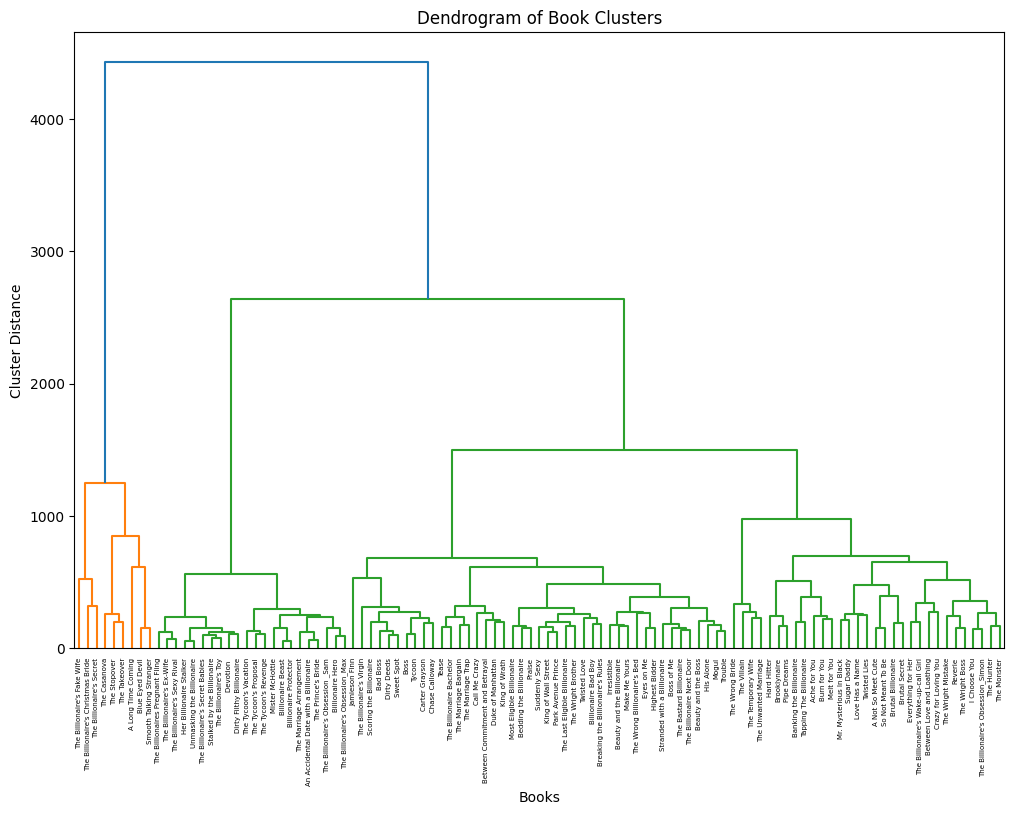

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(df_theme_distribution, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=df_theme_distribution.index, leaf_rotation=90)
plt.title("Dendrogram of Book Clusters")
plt.xlabel("Books")
plt.ylabel("Cluster Distance")
plt.show()

In [ ]:
# Group by cluster label and calculate the average for each theme
average_theme_distribution = df_theme_distribution.groupby('Cluster_Label').mean()

# Display the top 5 themes per cluster for interpretability
for cluster_label in average_theme_distribution.index:
    top_themes = average_theme_distribution.loc[cluster_label].nlargest(5)
    print(f"Cluster {cluster_label} Top Themes: {top_themes.index.tolist()}")
    print(f"Values: {top_themes.values}\n")

Cluster 1 Top Themes: ['Communication', 'Inner Conflicts and Decisions', 'Happy Emotions, Calm and Peace', 'Softer Erotic', 'Domestic Environment']
Values: [1390.          409.66666667  285.          266.66666667  264.        ]

Cluster 2 Top Themes: ['Communication', 'Happy Emotions, Calm and Peace', 'Domestic Environment', 'Softer Erotic', 'Luxury Living']
Values: [1245.5   512.25  335.5   300.    295.5 ]

Cluster 3 Top Themes: ['Communication', 'Inner Conflicts and Decisions', 'Highly Explicit Erotic', 'Softer Erotic', 'Happy Emotions, Calm and Peace']
Values: [815.5  391.25 363.   358.   231.25]

Cluster 4 Top Themes: ['Communication', 'Happy Emotions, Calm and Peace', 'Inner Conflicts and Decisions', 'Softer Erotic', 'Domestic Environment']
Values: [336.   189.75 170.25 159.25 128.75]

Cluster 5 Top Themes: ['Communication', 'Happy Emotions, Calm and Peace', 'Domestic Environment', 'Courtship and Flirting', 'Softer Erotic']
Values: [385.  201.  165.5 152.5 124. ]

Cluster 6 Top Th

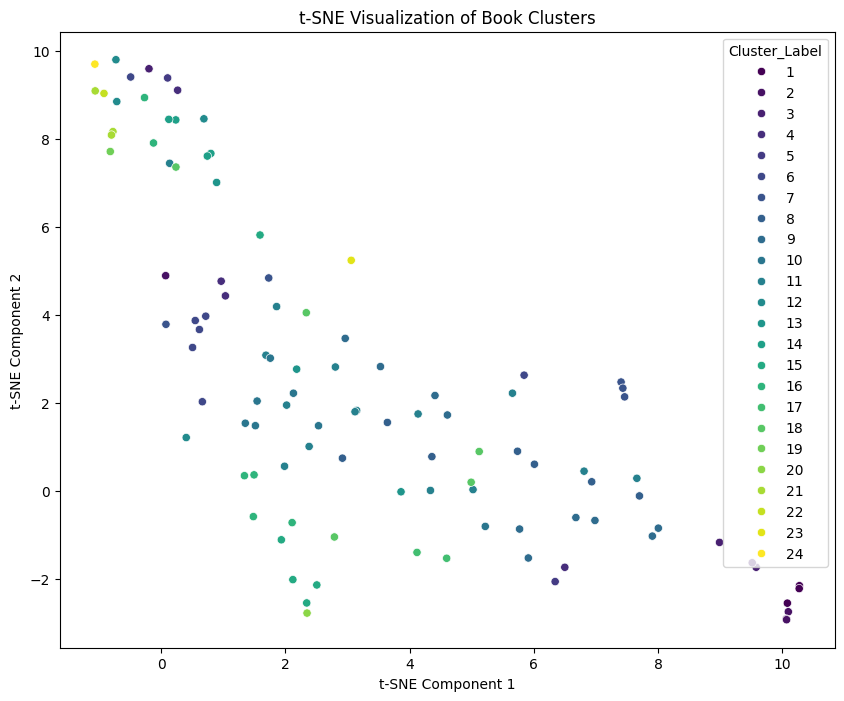

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(df_theme_distribution.drop(columns=['Cluster_Label']))

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df_theme_distribution['Cluster_Label'], palette="viridis", legend='full')
plt.title("t-SNE Visualization of Book Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Prepare the data without the cluster label
X = df_theme_distribution.drop(columns=['Cluster_Label'])

# Calculate silhouette score for the current clusters
silhouette_avg = silhouette_score(X, df_theme_distribution['Cluster_Label'])
print(f"Silhouette Score for Current Clustering: {silhouette_avg}")

Silhouette Score for Current Clustering: -0.1012688112076926


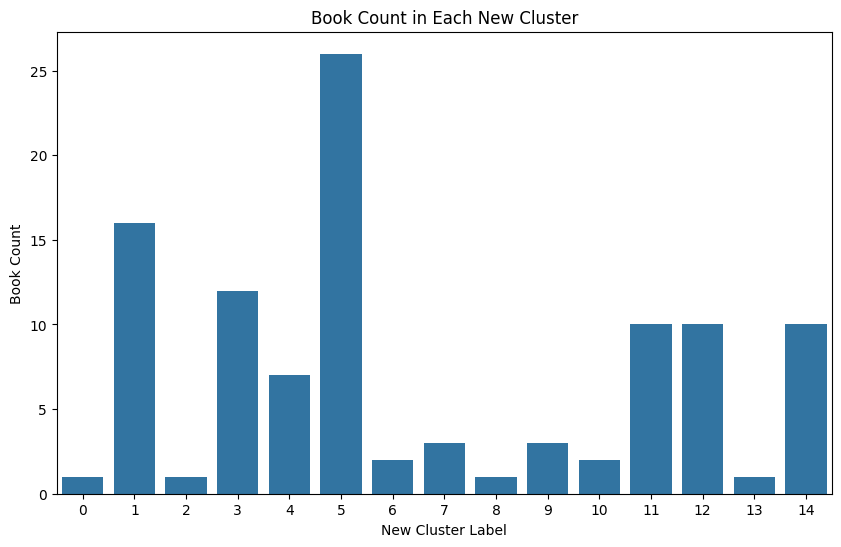

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Redefine clustering with fewer clusters
num_clusters = 15  # Try reducing cluster count
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_theme_distribution['New_Cluster_Label'] = kmeans.fit_predict(df_theme_distribution.drop(columns='Cluster_Label'))

# Visualize the new cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='New_Cluster_Label', data=df_theme_distribution)
plt.title("Book Count in Each New Cluster")
plt.xlabel("New Cluster Label")
plt.ylabel("Book Count")
plt.show()

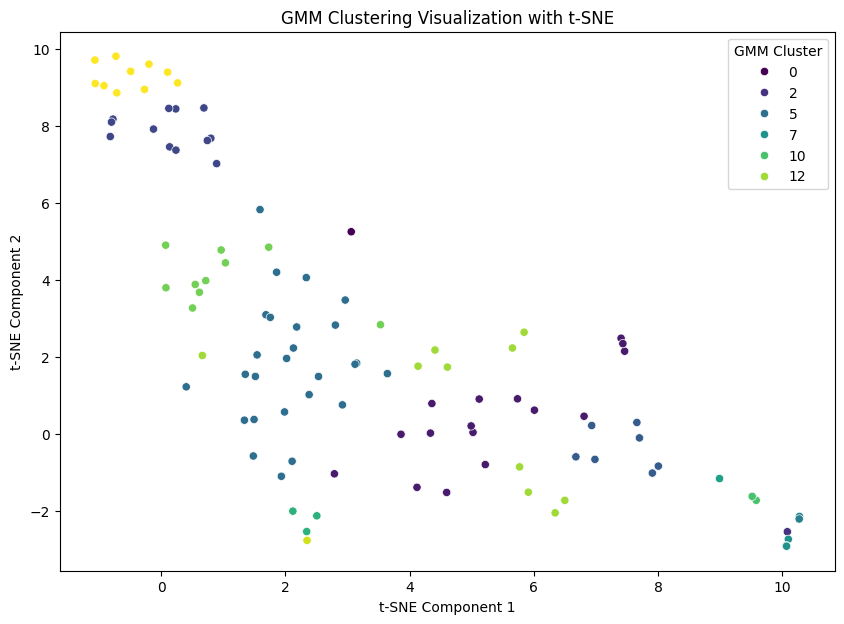

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=num_clusters, random_state=42)
df_theme_distribution['GMM_Cluster'] = gmm.fit_predict(df_theme_distribution.drop(columns='Cluster_Label'))

# t-SNE for visualization of GMM clusters
tsne_gmm = TSNE(n_components=2, random_state=42)
tsne_gmm_results = tsne_gmm.fit_transform(df_theme_distribution.drop(columns=['Cluster_Label', 'New_Cluster_Label', 'GMM_Cluster']))

plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_gmm_results[:, 0], y=tsne_gmm_results[:, 1], hue=df_theme_distribution['GMM_Cluster'], palette='viridis')
plt.title("GMM Clustering Visualization with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="GMM Cluster")
plt.show()

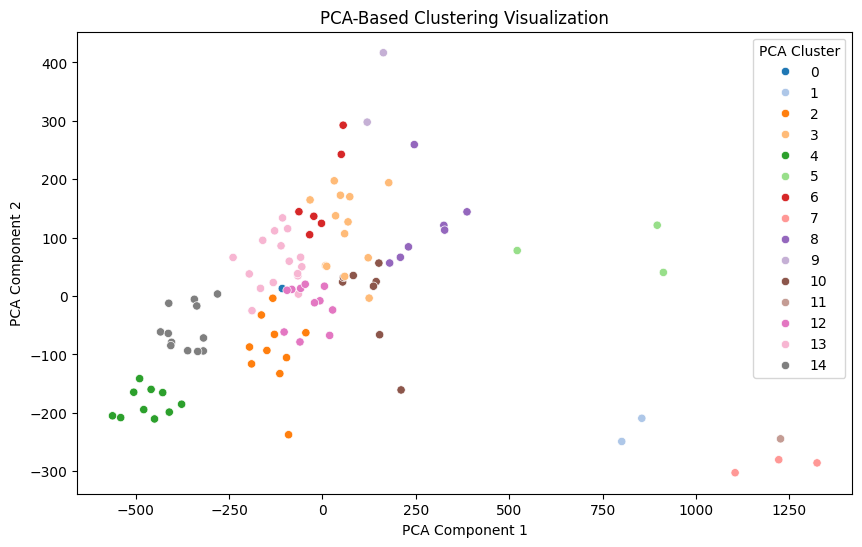

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Reduce dimensions before clustering
reduced_data = pca.fit_transform(df_theme_distribution.drop(columns=['Cluster_Label', 'New_Cluster_Label', 'GMM_Cluster']))

# Re-apply clustering on reduced data
kmeans_reduced = KMeans(n_clusters=num_clusters, random_state=42)
df_theme_distribution['PCA_Cluster'] = kmeans_reduced.fit_predict(reduced_data)

# Visualization of PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_theme_distribution['PCA_Cluster'], palette='tab20')
plt.title("PCA-Based Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="PCA Cluster")
plt.show()

In [ ]:
# Analyze top themes in each refined cluster
refined_clusters = df_theme_distribution.groupby('PCA_Cluster').mean()

# Print top themes per refined cluster
for cluster_id, row in refined_clusters.iterrows():
    top_themes = row.sort_values(ascending=False).head(5)
    print(f"\nRefined Cluster {cluster_id} Top Themes:")
    print(top_themes)


Refined Cluster 0 Top Themes:
Medical Care                      340.0
Communication                     289.0
Inner Conflicts and Decisions     278.0
Happy Emotions, Calm and Peace    250.0
Domestic Environment              233.0
Name: 0, dtype: float64

Refined Cluster 1 Top Themes:
Communication                     1263.0
Inner Conflicts and Decisions      430.5
Happy Emotions, Calm and Peace     276.5
Domestic Environment               244.0
Softer Erotic                      238.0
Name: 1, dtype: float64

Refined Cluster 2 Top Themes:
Communication                     311.5
Happy Emotions, Calm and Peace    240.2
Inner Conflicts and Decisions     179.5
Domestic Environment              139.3
Courtship and Flirting            138.6
Name: 2, dtype: float64

Refined Cluster 3 Top Themes:
Communication                     395.461538
Inner Conflicts and Decisions     362.153846
Courtship and Flirting            263.692308
Softer Erotic                     225.000000
Happy Emotions, Cal

In [ ]:
# Check if any NaN values are present in the entire DataFrame
if df_theme_distribution.isnull().values.any():
    print("NaN values detected in df_theme_distribution.")
else:
    print("No NaN values found in df_theme_distribution.")

No NaN values found in df_theme_distribution.


In [ ]:
# Display columns with NaNs and count of NaNs per column
nan_counts = df_theme_distribution.isnull().sum()
print("NaN counts per column:")
print(nan_counts[nan_counts > 0])

NaN counts per column:
Series([], dtype: int64)


In [ ]:
# Display rows where 'Sub_Cluster' has NaN values
nan_rows = df_theme_distribution[df_theme_distribution['Sub_Cluster'].isna()]
print("Rows with NaN in Sub_Cluster:")
print(nan_rows)

KeyError: 'Sub_Cluster'

In [ ]:
df_theme_distribution['Sub_Cluster'] = kmeans.labels_

kmeans = KMeans(n_clusters=10, random_state=42)
df_theme_distribution['Sub_Cluster'] = kmeans.fit_predict(df_theme_distribution.drop(columns=['Cluster_Label', 'New_Cluster_Label', 'GMM_Cluster']))

gmm = GaussianMixture(n_components=10, random_state=42)
df_theme_distribution['Sub_Cluster'] = gmm.fit_predict(df_theme_distribution.drop(columns=['Cluster_Label', 'New_Cluster_Label', 'GMM_Cluster']))

print("Sub_Cluster column after assignment:")
print(df_theme_distribution['Sub_Cluster'].value_counts())

Sub_Cluster column after assignment:
Sub_Cluster
5    39
3    22
1    20
4    10
9     4
8     3
7     3
6     2
2     1
0     1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


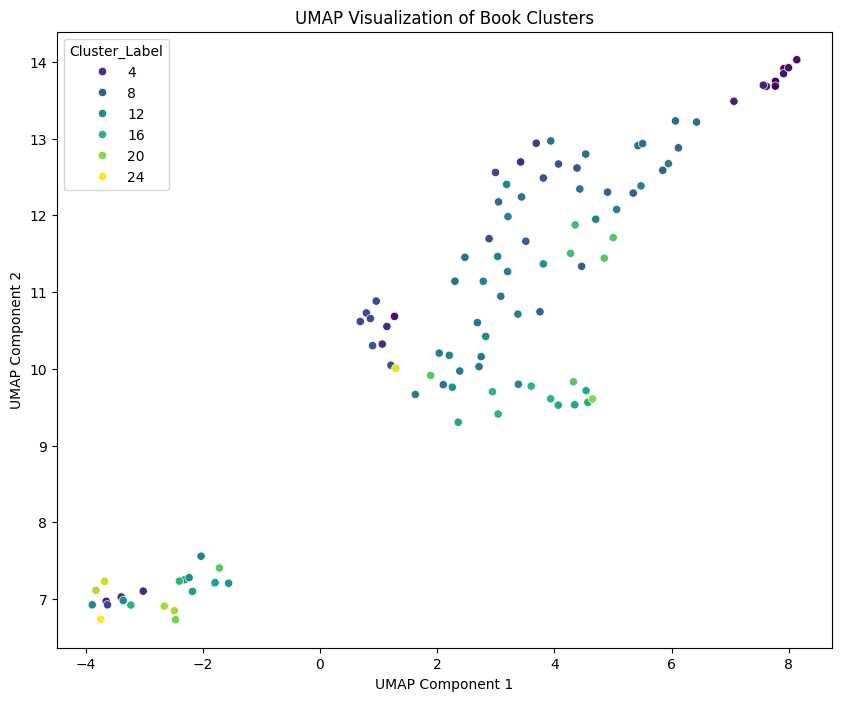

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering - Silhouette Score: -0.071
Spectral Clustering - Davies-Bouldin Index: 2.578


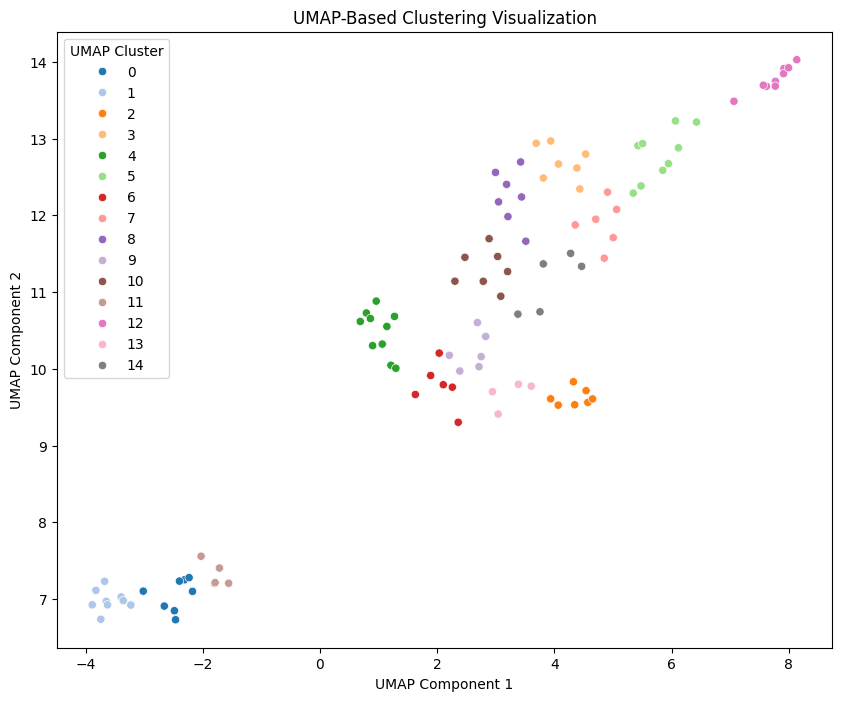

In [ ]:
!pip install umap-learn

from umap import UMAP
from sklearn.cluster import SpectralClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Apply UMAP for better visualization and potential clustering
umap = UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
umap_results = umap.fit_transform(df_theme_distribution.drop(columns=['Cluster_Label']))

# Plot UMAP results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=df_theme_distribution['Cluster_Label'], palette="viridis")
plt.title("UMAP Visualization of Book Clusters")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

# Spectral Clustering based on cosine similarity matrix
num_clusters = 15  # Adjust this based on previous cluster evaluation
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
df_theme_distribution['Spectral_Cluster'] = spectral_clustering.fit_predict(cosine_sim_matrix)

# Evaluate clusters using Davies-Bouldin Index and Silhouette Score
silhouette_avg_spectral = silhouette_score(df_theme_distribution.drop(columns=['Cluster_Label', 'Spectral_Cluster']), df_theme_distribution['Spectral_Cluster'])
davies_bouldin_spectral = davies_bouldin_score(df_theme_distribution.drop(columns=['Cluster_Label', 'Spectral_Cluster']), df_theme_distribution['Spectral_Cluster'])

print(f"Spectral Clustering - Silhouette Score: {silhouette_avg_spectral:.3f}")
print(f"Spectral Clustering - Davies-Bouldin Index: {davies_bouldin_spectral:.3f}")

# Re-run the theme distribution clustering with UMAP-reduced data if UMAP clustering was successful
umap_cluster = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
df_theme_distribution['UMAP_Cluster'] = umap_cluster.fit_predict(umap_results)

# Visualization of UMAP clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=df_theme_distribution['UMAP_Cluster'], palette='tab20')
plt.title("UMAP-Based Clustering Visualization")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="UMAP Cluster")
plt.show()

In [ ]:
# Calculate the average theme values per sub-cluster
sub_cluster_means = df_theme_distribution.groupby('Sub_Cluster').mean()

# Display the top themes for each sub-cluster
for cluster_id, row in sub_cluster_means.iterrows():
    top_themes = row.nlargest(5)
    print(f"\nSub-Cluster {cluster_id} Top Themes:")
    print(top_themes)


Sub-Cluster 0 Top Themes:
Medical Care                      340.0
Communication                     289.0
Inner Conflicts and Decisions     278.0
Happy Emotions, Calm and Peace    250.0
Domestic Environment              233.0
Name: 0, dtype: float64

Sub-Cluster 1 Top Themes:
Communication                     402.7
Inner Conflicts and Decisions     343.5
Courtship and Flirting            243.5
Softer Erotic                     231.9
Happy Emotions, Calm and Peace    231.7
Name: 1, dtype: float64

Sub-Cluster 2 Top Themes:
Communication                    1644.0
Courtship and Flirting            371.0
Inner Conflicts and Decisions     368.0
Softer Erotic                     324.0
Domestic Environment              304.0
Name: 2, dtype: float64

Sub-Cluster 3 Top Themes:
Inner Conflicts and Decisions    119.318182
Communication                    111.545455
Softer Erotic                     96.500000
Courtship and Flirting            79.590909
Highly Explicit Erotic            72.272727


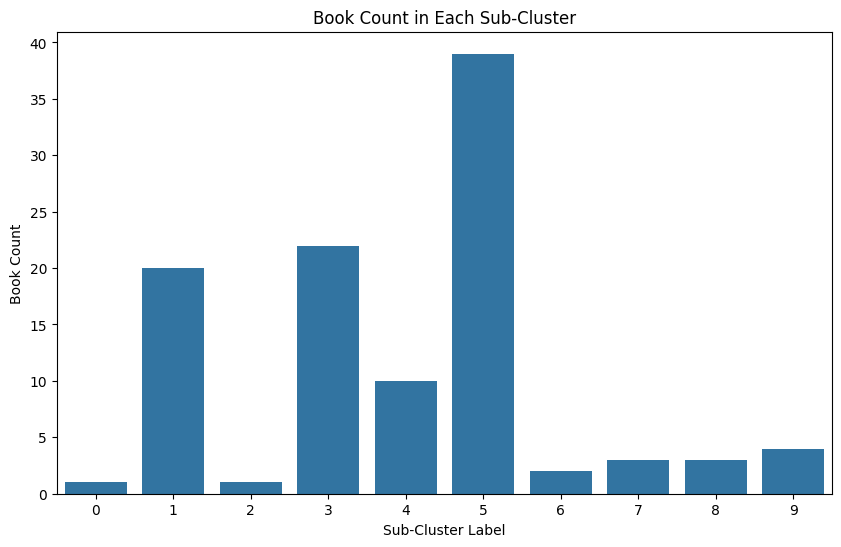

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Sub_Cluster', data=df_theme_distribution)
plt.title("Book Count in Each Sub-Cluster")
plt.xlabel("Sub-Cluster Label")
plt.ylabel("Book Count")
plt.show()

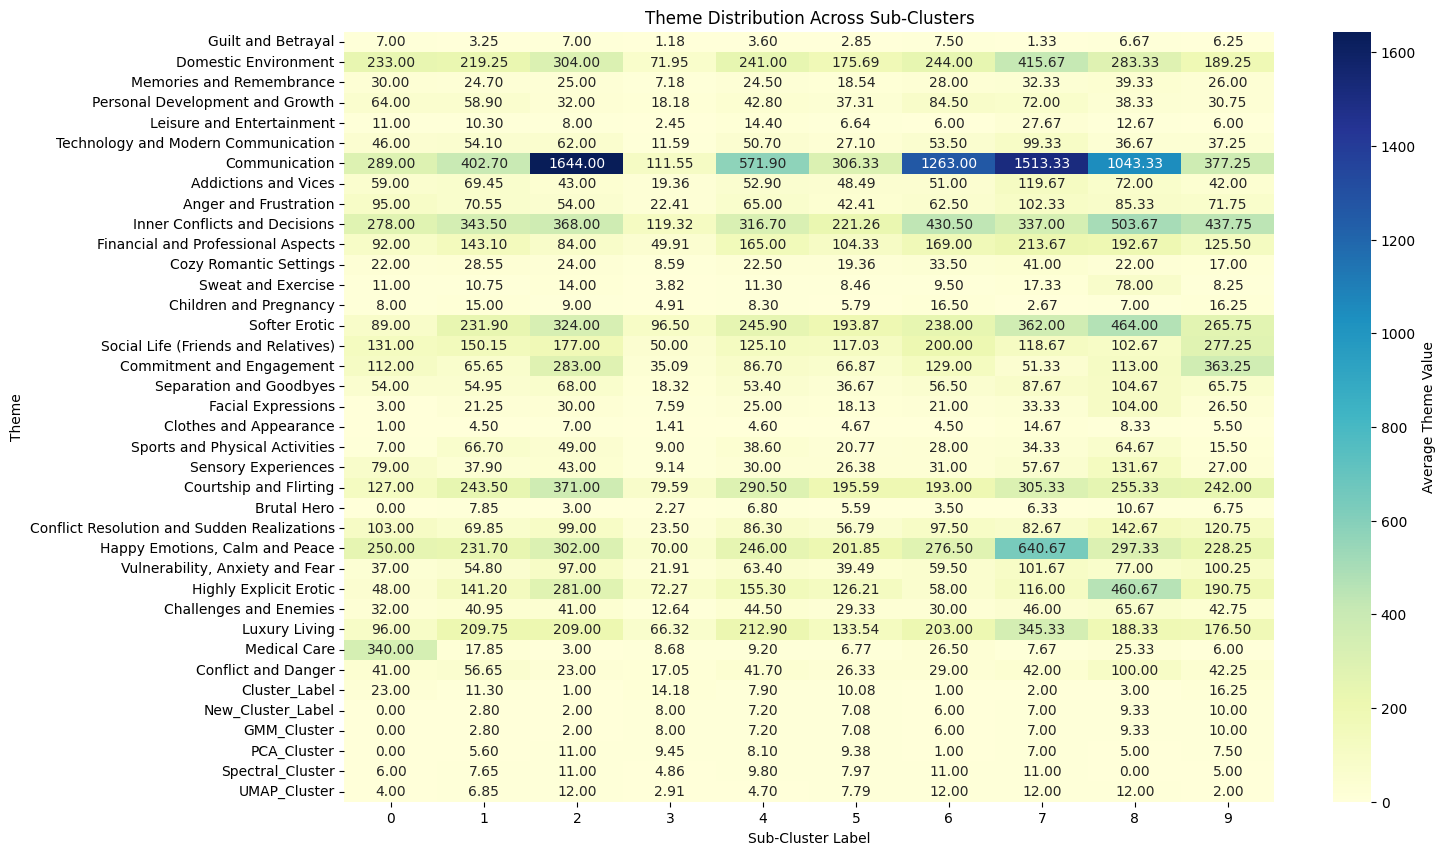

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(sub_cluster_means.T, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Average Theme Value'})
plt.title("Theme Distribution Across Sub-Clusters")
plt.xlabel("Sub-Cluster Label")
plt.ylabel("Theme")
plt.show()

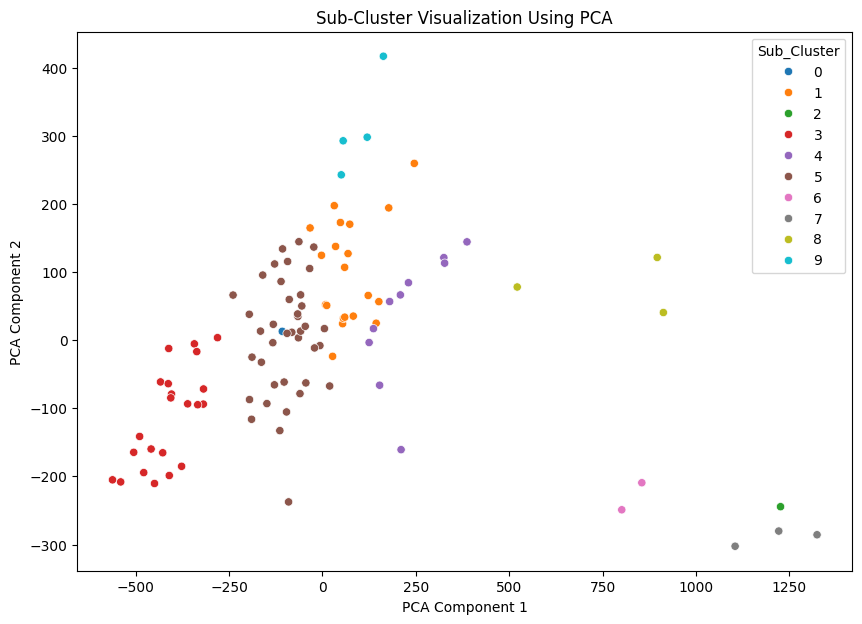

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_theme_distribution.drop(columns=['Sub_Cluster', 'Cluster_Label', 'New_Cluster_Label', 'GMM_Cluster']))

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=df_theme_distribution['Sub_Cluster'], palette='tab10', legend='full')
plt.title("Sub-Cluster Visualization Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_theme_distribution.drop(columns=['Sub_Cluster', 'Cluster_Label', 'New_Cluster_Label', 'GMM_Cluster']), df_theme_distribution['Sub_Cluster'])
print(f"Silhouette Score for Sub-Clusters: {silhouette_avg}")

Silhouette Score for Sub-Clusters: 0.2663314296067875


In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming 'df_theme_distribution' is the DataFrame with theme distributions and cluster labels
# Drop non-theme columns for ANOVA analysis
theme_columns = df_theme_distribution.columns.difference(['Cluster_Label', 'Sub_Cluster', 'New_Cluster_Label', 'GMM_Cluster', 'PCA_Cluster', 'Spectral_Cluster', 'UMAP_Cluster'])

# Prepare a dictionary to store ANOVA results
anova_results = {}

# Perform ANOVA for each theme
for theme in theme_columns:
    # Group theme values by clusters
    groups = [df_theme_distribution[df_theme_distribution['Sub_Cluster'] == cluster][theme].values for cluster in df_theme_distribution['Sub_Cluster'].unique()]

    # Conduct ANOVA test across clusters
    f_stat, p_value = stats.f_oneway(*groups)

    # Store the results
    anova_results[theme] = {'F-Statistic': f_stat, 'p-value': p_value}

# Convert the results to a DataFrame and sort by p-value to identify most significant themes
anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.sort_values(by='p-value')

# Display top themes with the lowest p-values (most distinguishing)
print("Top distinguishing themes based on ANOVA:")
print(anova_df.head(10))


Top distinguishing themes based on ANOVA:
                                             F-Statistic       p-value
Communication                                 317.774518  8.218831e-67
Medical Care                                   84.068206  2.833600e-41
Sweat and Exercise                             82.323185  6.804824e-41
Happy Emotions, Calm and Peace                 41.167295  5.615509e-29
Facial Expressions                             38.810120  4.936066e-28
Sensory Experiences                            37.574030  1.607402e-27
Conflict Resolution and Sudden Realizations    36.582247  4.235322e-27
Luxury Living                                  33.623459  8.616083e-26
Softer Erotic                                  29.621611  7.032448e-24
Inner Conflicts and Decisions                  28.911430  1.605128e-23


In [ ]:
# Define weights based on p-values (example scheme: inverse of rank to assign higher weights to lower p-values)
anova_df['Weight'] = 1 / (anova_df['p-value'].rank())

# Create a dictionary of weights for each theme
theme_weights = anova_df['Weight'].to_dict()

# Display theme weights
print("Theme weights based on ANOVA results:")
print(theme_weights)

Theme weights based on ANOVA results:
{'Communication': 1.0, 'Medical Care': 0.5, 'Sweat and Exercise': 0.3333333333333333, 'Happy Emotions, Calm and Peace': 0.25, 'Facial Expressions': 0.2, 'Sensory Experiences': 0.16666666666666666, 'Conflict Resolution and Sudden Realizations': 0.14285714285714285, 'Luxury Living': 0.125, 'Softer Erotic': 0.1111111111111111, 'Inner Conflicts and Decisions': 0.1, 'Separation and Goodbyes': 0.09090909090909091, 'Domestic Environment': 0.08333333333333333, 'Technology and Modern Communication': 0.07692307692307693, 'Vulnerability, Anxiety and Fear': 0.07142857142857142, 'Highly Explicit Erotic': 0.06666666666666667, 'Commitment and Engagement': 0.0625, 'Courtship and Flirting': 0.058823529411764705, 'Anger and Frustration': 0.05555555555555555, 'Financial and Professional Aspects': 0.05263157894736842, 'Challenges and Enemies': 0.05, 'Social Life (Friends and Relatives)': 0.047619047619047616, 'Conflict and Danger': 0.045454545454545456, 'Memories and 

In [ ]:
# Apply theme weights to the theme distribution DataFrame
for theme, weight in theme_weights.items():
    df_theme_distribution[theme] *= weight

In [ ]:
normality_results = {}
homogeneity_results = {}

for theme in theme_columns:
    normality_p_values = []

    for cluster in df_theme_distribution['Sub_Cluster'].unique():
        cluster_data = df_theme_distribution[df_theme_distribution['Sub_Cluster'] == cluster][theme]

        # Check if the cluster has at least 3 data points
        if len(cluster_data) >= 3:
            stat, p = stats.shapiro(cluster_data)  # Shapiro-Wilk test
            normality_p_values.append(p)
        else:
            # If fewer than 3 points, append NaN or a placeholder
            normality_p_values.append(float('nan'))

    # Store normality results
    normality_results[theme] = normality_p_values

    # Check homogeneity of variances using Levene’s test
    groups = [df_theme_distribution[df_theme_distribution['Sub_Cluster'] == cluster][theme] for cluster in df_theme_distribution['Sub_Cluster'].unique()]
    stat, p_value = stats.levene(*groups)
    homogeneity_results[theme] = p_value

# Convert normality results to a DataFrame for inspection
normality_df = pd.DataFrame(normality_results, index=df_theme_distribution['Sub_Cluster'].unique()).T
homogeneity_df = pd.Series(homogeneity_results, name='Levene_p_value')

print("Normality Test Results (Shapiro-Wilk test p-values for each cluster):")
print(normality_df)
print("\nHomogeneity of Variances Test Results (Levene’s test p-values):")
print(homogeneity_df)

Normality Test Results (Shapiro-Wilk test p-values for each cluster):
                                              2         4         3  \
Addictions and Vices                        NaN  0.845249  0.077038   
Anger and Frustration                       NaN  0.190490  0.134033   
Brutal Hero                                 NaN  0.405850  0.000007   
Challenges and Enemies                      NaN  0.061777  0.196156   
Children and Pregnancy                      NaN  0.000144  0.000016   
Clothes and Appearance                      NaN  0.425960  0.000005   
Commitment and Engagement                   NaN  0.901851  0.011483   
Communication                               NaN  0.597009  0.104554   
Conflict Resolution and Sudden Realizations NaN  0.311713  0.353657   
Conflict and Danger                         NaN  0.468514  0.000171   
Courtship and Flirting                      NaN  0.559606  0.137980   
Cozy Romantic Settings                      NaN  0.806990  0.079174   
Domesti

In [ ]:
anova_themes = []
kruskal_themes = []

# Identify themes for ANOVA and Kruskal-Wallis based on Levene’s test and Shapiro-Wilk test results
for theme in theme_columns:
    # Check if all clusters for the theme pass normality and homogeneity of variances
    normality_pass = all(p > 0.05 for p in normality_df.loc[theme] if not pd.isna(p))
    homogeneity_pass = homogeneity_df[theme] > 0.05

    if normality_pass and homogeneity_pass:
        anova_themes.append(theme)
    else:
        kruskal_themes.append(theme)

print("Themes for ANOVA:", anova_themes)
print("Themes for Kruskal-Wallis:", kruskal_themes)

Themes for ANOVA: ['Communication', 'Domestic Environment', 'Luxury Living', 'Separation and Goodbyes', 'Softer Erotic']
Themes for Kruskal-Wallis: ['Addictions and Vices', 'Anger and Frustration', 'Brutal Hero', 'Challenges and Enemies', 'Children and Pregnancy', 'Clothes and Appearance', 'Commitment and Engagement', 'Conflict Resolution and Sudden Realizations', 'Conflict and Danger', 'Courtship and Flirting', 'Cozy Romantic Settings', 'Facial Expressions', 'Financial and Professional Aspects', 'Guilt and Betrayal', 'Happy Emotions, Calm and Peace', 'Highly Explicit Erotic', 'Inner Conflicts and Decisions', 'Leisure and Entertainment', 'Medical Care', 'Memories and Remembrance', 'Personal Development and Growth', 'Sensory Experiences', 'Social Life (Friends and Relatives)', 'Sports and Physical Activities', 'Sweat and Exercise', 'Technology and Modern Communication', 'Vulnerability, Anxiety and Fear']


In [ ]:
anova_results = {}

for theme in anova_themes:
    # Group data by cluster for the ANOVA test
    groups = [df_theme_distribution[df_theme_distribution['Sub_Cluster'] == cluster][theme].values for cluster in df_theme_distribution['Sub_Cluster'].unique()]

    # Perform one-way ANOVA
    f_stat, p_value = stats.f_oneway(*groups)

    # Store results
    anova_results[theme] = {'F-Statistic': f_stat, 'p-value': p_value}

# Convert results to DataFrame and display
anova_results_df = pd.DataFrame(anova_results).T
print("ANOVA Results:")
print(anova_results_df)

ANOVA Results:
                         F-Statistic       p-value
Communication             317.774518  8.218831e-67
Domestic Environment       24.501571  3.805109e-21
Luxury Living              33.623459  8.616083e-26
Separation and Goodbyes    26.733457  2.211608e-22
Softer Erotic              29.621611  7.032448e-24


In [ ]:
kruskal_results = {}

for theme in kruskal_themes:
    # Group data by cluster for the Kruskal-Wallis test
    groups = [df_theme_distribution[df_theme_distribution['Sub_Cluster'] == cluster][theme].values for cluster in df_theme_distribution['Sub_Cluster'].unique()]

    # Perform Kruskal-Wallis test
    stat, p_value = stats.kruskal(*groups)

    # Store results
    kruskal_results[theme] = {'Kruskal-Statistic': stat, 'p-value': p_value}

# Convert results to DataFrame and display
kruskal_results_df = pd.DataFrame(kruskal_results).T
print("Kruskal-Wallis Results:")
print(kruskal_results_df)

Kruskal-Wallis Results:
                                             Kruskal-Statistic       p-value
Addictions and Vices                                 43.622102  1.656700e-06
Anger and Frustration                                61.957021  5.616637e-10
Brutal Hero                                          23.657769  4.876456e-03
Challenges and Enemies                               56.215504  7.139360e-09
Children and Pregnancy                               20.543903  1.483697e-02
Clothes and Appearance                               35.785727  4.327163e-05
Commitment and Engagement                            32.771892  1.463296e-04
Conflict Resolution and Sudden Realizations          76.689694  7.324281e-13
Conflict and Danger                                  50.745073  7.799436e-08
Courtship and Flirting                               62.677742  4.073464e-10
Cozy Romantic Settings                               42.152366  3.082338e-06
Facial Expressions                                  

In [ ]:
# Combine ANOVA and Kruskal-Wallis results, focusing on p-values
combined_results = pd.concat([anova_results_df['p-value'], kruskal_results_df['p-value']], axis=0)
combined_results = combined_results.dropna().sort_values()  # Sort by significance

# Assign weights based on inverse ranking of p-values
combined_results['Weight'] = 1 / combined_results.rank()
theme_weights = combined_results['Weight'].to_dict()

print("Theme weights based on significance:")
print(theme_weights)

Theme weights based on significance:
{'Communication': 1.0, 'Luxury Living': 0.5, 'Softer Erotic': 0.3333333333333333, 'Separation and Goodbyes': 0.25, 'Domestic Environment': 0.2, 'Conflict Resolution and Sudden Realizations': 0.16666666666666666, 'Inner Conflicts and Decisions': 0.14285714285714285, 'Technology and Modern Communication': 0.125, 'Happy Emotions, Calm and Peace': 0.1111111111111111, 'Sensory Experiences': 0.1, 'Courtship and Flirting': 0.09090909090909091, 'Anger and Frustration': 0.08333333333333333, 'Sports and Physical Activities': 0.07692307692307693, 'Vulnerability, Anxiety and Fear': 0.07142857142857142, 'Financial and Professional Aspects': 0.06666666666666667, 'Memories and Remembrance': 0.0625, 'Challenges and Enemies': 0.058823529411764705, 'Facial Expressions': 0.05555555555555555, 'Social Life (Friends and Relatives)': 0.05263157894736842, 'Conflict and Danger': 0.05, 'Sweat and Exercise': 0.047619047619047616, 'Personal Development and Growth': 0.045454545

In [ ]:
# Apply theme weights to the theme distribution data
for theme, weight in theme_weights.items():
    df_theme_distribution[theme] *= weight

In [ ]:
# Create a copy to apply weights without altering the original data
df_theme_distribution_weighted = df_theme_distribution.copy()

# Define theme columns explicitly by excluding non-theme columns
non_theme_columns = ['Cluster_Label', 'Sub_Cluster', 'New_Cluster_Label',
                     'GMM_Cluster', 'PCA_Cluster', 'Spectral_Cluster', 'UMAP_Cluster', 'Agglomerative_Cluster']
theme_columns = [col for col in df_theme_distribution.columns if col not in non_theme_columns]

# Apply theme weights to the copied DataFrame for theme columns only
for theme, weight in theme_weights.items():
    if theme in theme_columns:
        df_theme_distribution_weighted[theme] *= weight

# Display the first few rows to verify the weighted data
print("Weighted theme distribution (first few rows):")
print(df_theme_distribution_weighted[theme_columns].head())

Weighted theme distribution (first few rows):
                                       Guilt and Betrayal  \
Book_Title                                                  
A Long Time Coming                               0.000343   
A Not So Meet Cute                               0.000490   
Ache for You                                     0.000049   
An Accidental Date with a Billionaire            0.000098   
Bad Boss                                         0.000098   

                                       Domestic Environment  \
Book_Title                                                    
A Long Time Coming                                 1.013333   
A Not So Meet Cute                                 0.826667   
Ache for You                                       0.763333   
An Accidental Date with a Billionaire              0.253333   
Bad Boss                                           0.400000   

                                       Memories and Remembrance  \
Book_Title       

In [ ]:
# Define X_weighted by dropping non-theme columns
X_weighted = df_theme_distribution_weighted[theme_columns]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


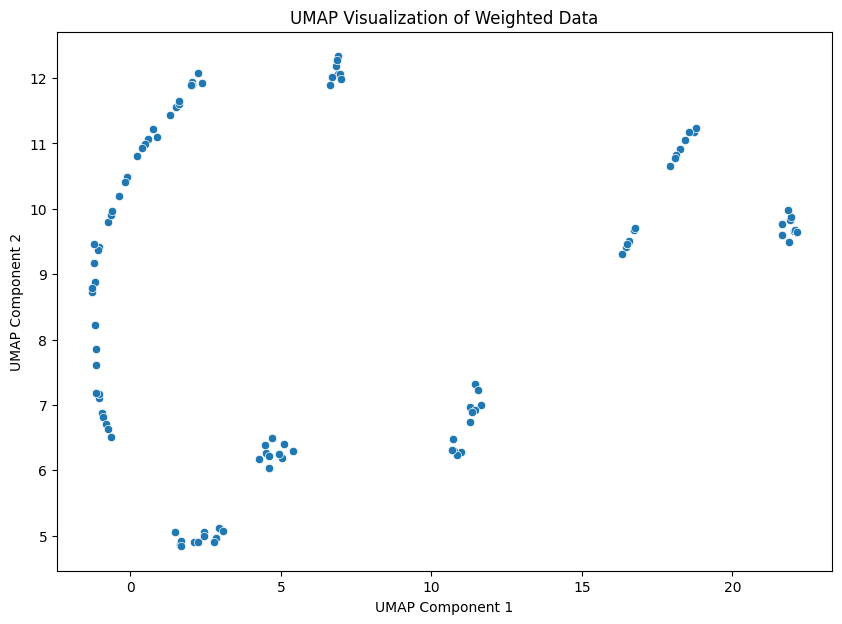

In [ ]:
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

# Apply UMAP for dimensionality reduction
umap = UMAP(n_neighbors=10, min_dist=0.1, random_state=42)
umap_results = umap.fit_transform(X_weighted)

# Plot UMAP results (without clustering initially)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], legend=None)
plt.title("UMAP Visualization of Weighted Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define number of clusters
num_clusters = 10

# KMeans Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_theme_distribution_weighted['KMeans_Cluster'] = kmeans.fit_predict(X_weighted)
silhouette_kmeans = silhouette_score(X_weighted, df_theme_distribution_weighted['KMeans_Cluster'])

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
df_theme_distribution_weighted['GMM_Cluster'] = gmm.fit_predict(X_weighted)
silhouette_gmm = silhouette_score(X_weighted, df_theme_distribution_weighted['GMM_Cluster'])

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
df_theme_distribution_weighted['Agglomerative_Cluster'] = agglo.fit_predict(X_weighted)
silhouette_agglo = silhouette_score(X_weighted, df_theme_distribution_weighted['Agglomerative_Cluster'])

# Store silhouette scores in a DataFrame
silhouette_scores = pd.DataFrame({
    'Method': ['KMeans', 'Gaussian Mixture Model (GMM)', 'Agglomerative Hierarchical Clustering'],
    'Silhouette Score': [silhouette_kmeans, silhouette_gmm, silhouette_agglo]
})

print("\nSilhouette Scores Comparison:")
print(silhouette_scores)


Silhouette Scores Comparison:
                                  Method  Silhouette Score
0                                 KMeans          0.548770
1           Gaussian Mixture Model (GMM)          0.548770
2  Agglomerative Hierarchical Clustering          0.548502


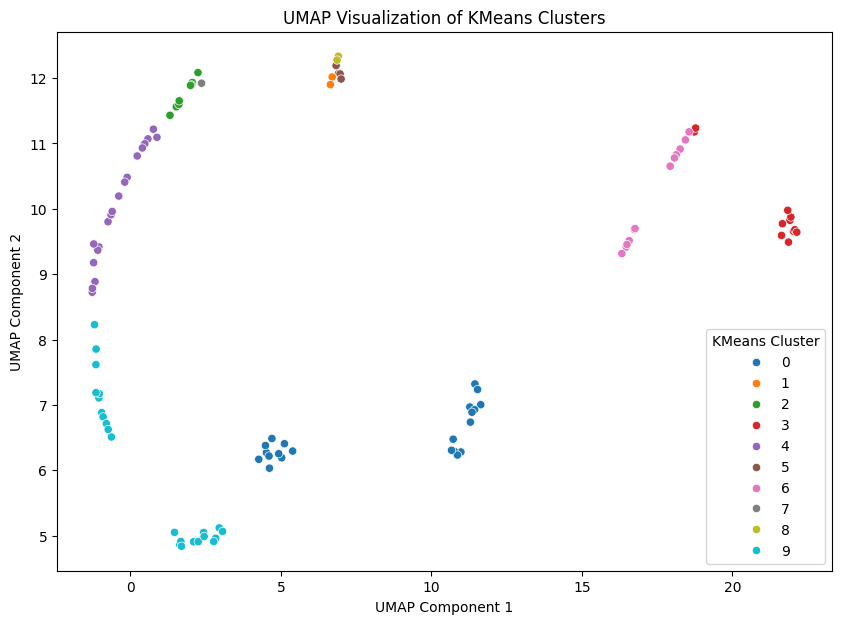

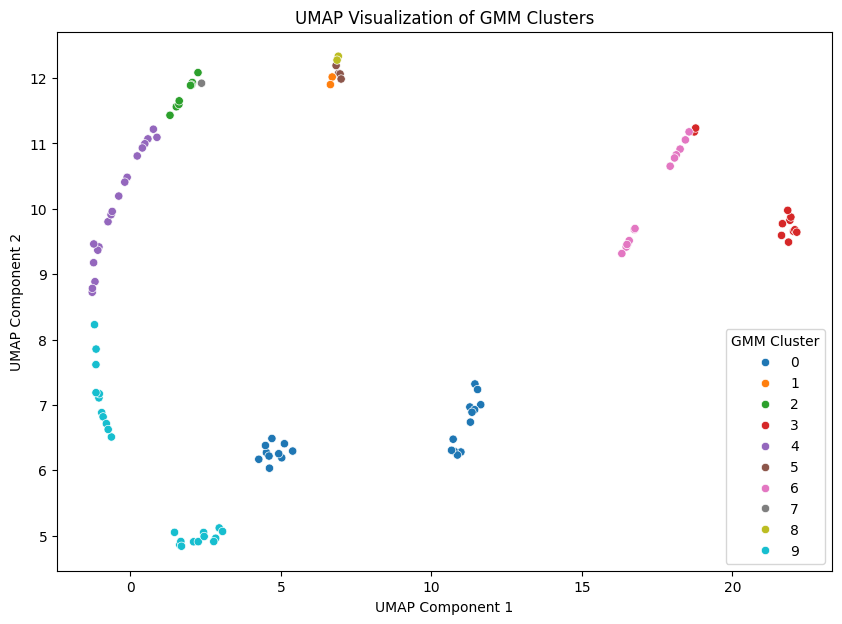

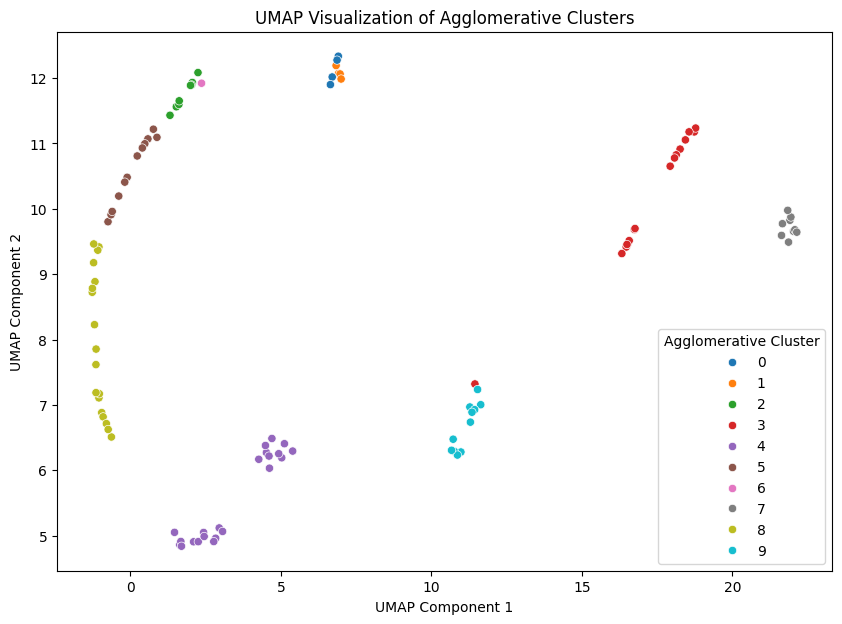

In [ ]:
# UMAP Visualization with KMeans Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=df_theme_distribution_weighted['KMeans_Cluster'], palette='tab10', legend='full')
plt.title("UMAP Visualization of KMeans Clusters")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="KMeans Cluster")
plt.show()

# UMAP Visualization with GMM Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=df_theme_distribution_weighted['GMM_Cluster'], palette='tab10', legend='full')
plt.title("UMAP Visualization of GMM Clusters")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="GMM Cluster")
plt.show()

# UMAP Visualization with Agglomerative Clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=df_theme_distribution_weighted['Agglomerative_Cluster'], palette='tab10', legend='full')
plt.title("UMAP Visualization of Agglomerative Clusters")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Agglomerative Cluster")
plt.show()

In [ ]:
# List to store silhouette scores for different numbers of clusters
silhouette_scores_refined = {}

# Try different numbers of clusters
for n_clusters in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    agglo_refined = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agglo_refined.fit_predict(X_weighted)
    silhouette_avg = silhouette_score(X_weighted, labels)
    silhouette_scores_refined[n_clusters] = silhouette_avg
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

# Display all refined silhouette scores for comparison
print("\nRefined Silhouette Scores Comparison:")
print(silhouette_scores_refined)

Silhouette Score for 5 clusters: 0.589472109113778
Silhouette Score for 6 clusters: 0.582622060923416
Silhouette Score for 7 clusters: 0.5810463630599622
Silhouette Score for 8 clusters: 0.5672334757681131
Silhouette Score for 9 clusters: 0.5245566976679048
Silhouette Score for 10 clusters: 0.5485024269630051
Silhouette Score for 11 clusters: 0.5485540773294446
Silhouette Score for 12 clusters: 0.5522366174639782
Silhouette Score for 13 clusters: 0.5579091516806362
Silhouette Score for 14 clusters: 0.567767349007877
Silhouette Score for 15 clusters: 0.5786503946591576

Refined Silhouette Scores Comparison:
{5: 0.589472109113778, 6: 0.582622060923416, 7: 0.5810463630599622, 8: 0.5672334757681131, 9: 0.5245566976679048, 10: 0.5485024269630051, 11: 0.5485540773294446, 12: 0.5522366174639782, 13: 0.5579091516806362, 14: 0.567767349007877, 15: 0.5786503946591576}


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 5 clusters for broad thematic analysis
agglo_5 = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_theme_distribution_weighted['Broad_Cluster'] = agglo_5.fit_predict(X_weighted)

# Calculate the mean values of each theme within each cluster
broad_theme_means = df_theme_distribution_weighted.groupby('Broad_Cluster')[theme_columns].mean()

# Display the top 5 themes for each of the 5 clusters
print("Top Themes in Each of the 5 Broad Clusters:")
for cluster_id, row in broad_theme_means.iterrows():
    top_themes = row.nlargest(30)
    print(f"\nCluster {cluster_id} Top Themes:")
    print(top_themes)

Top Themes in Each of the 5 Broad Clusters:

Cluster 0 Top Themes:
Communication                                  352.206349
Luxury Living                                    5.046131
Softer Erotic                                    2.580247
Happy Emotions, Calm and Peace                   0.671664
Domestic Environment                             0.644233
Inner Conflicts and Decisions                    0.562488
Conflict Resolution and Sudden Realizations      0.264928
Separation and Goodbyes                          0.253698
Courtship and Flirting                           0.105185
Sensory Experiences                              0.051878
Technology and Modern Communication              0.045807
Financial and Professional Aspects               0.028241
Anger and Frustration                            0.020809
Social Life (Friends and Relatives)              0.018193
Vulnerability, Anxiety and Fear                  0.017556
Highly Explicit Erotic                           0.013129
Facia

In [ ]:
# Apply Agglomerative Clustering with 15 clusters for detailed thematic segmentation
agglo_15 = AgglomerativeClustering(n_clusters=15, linkage='ward')
df_theme_distribution_weighted['Detailed_Cluster'] = agglo_15.fit_predict(X_weighted)

# Calculate the mean values of each theme within each cluster
detailed_theme_means = df_theme_distribution_weighted.groupby('Detailed_Cluster')[theme_columns].mean()

# Display the top 5 themes for each of the 15 clusters
print("Top Themes in Each of the 15 Detailed Clusters:")
for cluster_id, row in detailed_theme_means.iterrows():
    top_themes = row.nlargest(30)
    print(f"\nCluster {cluster_id} Top Themes:")
    print(top_themes)

Top Themes in Each of the 15 Detailed Clusters:

Cluster 0 Top Themes:
Communication                                  453.583333
Luxury Living                                    6.036458
Softer Erotic                                    2.732510
Happy Emotions, Calm and Peace                   0.768004
Domestic Environment                             0.686944
Inner Conflicts and Decisions                    0.629932
Separation and Goodbyes                          0.305871
Conflict Resolution and Sudden Realizations      0.267857
Courtship and Flirting                           0.114325
Technology and Modern Communication              0.064303
Sensory Experiences                              0.059167
Financial and Professional Aspects               0.037251
Anger and Frustration                            0.024949
Vulnerability, Anxiety and Fear                  0.017948
Social Life (Friends and Relatives)              0.017478
Facial Expressions                               0.013066
H

In [ ]:
# Remove 'Communication' from the theme weights dictionary
theme_weights_adjusted = {theme: weight for theme, weight in theme_weights.items() if theme != 'Communication'}

# Create a new weighted DataFrame excluding "Communication" and non-thematic columns
df_theme_distribution_weighted = df_theme_distribution.copy()

# Apply adjusted weights only to the specified theme columns
for theme, weight in theme_weights_adjusted.items():
    if theme in theme_columns:
        df_theme_distribution_weighted[theme] *= weight

# Drop non-thematic columns and "Communication" from the weighted DataFrame
non_thematic_columns = ['Cluster_Label', 'Sub_Cluster', 'New_Cluster_Label',
                        'GMM_Cluster', 'PCA_Cluster', 'Spectral_Cluster', 'UMAP_Cluster', 'Agglomerative_Cluster']
columns_to_drop = non_thematic_columns + ['Communication']
df_theme_distribution_weighted = df_theme_distribution_weighted.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows to verify the weighted data
print("Weighted theme distribution without Communication and non-thematic columns (first few rows):")
print(df_theme_distribution_weighted.head())

Weighted theme distribution without Communication and non-thematic columns (first few rows):
                                       Guilt and Betrayal  \
Book_Title                                                  
A Long Time Coming                               0.000343   
A Not So Meet Cute                               0.000490   
Ache for You                                     0.000049   
An Accidental Date with a Billionaire            0.000098   
Bad Boss                                         0.000098   

                                       Domestic Environment  \
Book_Title                                                    
A Long Time Coming                                 1.013333   
A Not So Meet Cute                                 0.826667   
Ache for You                                       0.763333   
An Accidental Date with a Billionaire              0.253333   
Bad Boss                                           0.400000   

                                     

In [ ]:
# Define X_weighted with only the relevant theme columns, excluding non-thematic and "Communication" columns
X_weighted = df_theme_distribution_weighted

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 5 clusters for broad thematic analysis
agglo_5 = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_theme_distribution_weighted['Broad_Cluster'] = agglo_5.fit_predict(X_weighted)

# Calculate the mean values of each theme within each cluster
broad_theme_means = df_theme_distribution_weighted.groupby('Broad_Cluster').mean()

# Display the top 5 themes for each of the 5 clusters
print("Top Themes in Each of the 5 Broad Clusters (without Communication and non-thematic columns):")
for cluster_id, row in broad_theme_means.iterrows():
    top_themes = row.nlargest(30)
    print(f"\nCluster {cluster_id} Top Themes:")
    print(top_themes)

Top Themes in Each of the 5 Broad Clusters (without Communication and non-thematic columns):

Cluster 0 Top Themes:
Luxury Living                                  8.903409
Softer Erotic                                  3.508418
Happy Emotions, Calm and Peace                 1.091470
Domestic Environment                           1.001818
Inner Conflicts and Decisions                  0.706865
Separation and Goodbyes                        0.365186
Conflict Resolution and Sudden Realizations    0.363636
Courtship and Flirting                         0.131657
Technology and Modern Communication            0.078453
Sensory Experiences                            0.078030
Financial and Professional Aspects             0.044189
Anger and Frustration                          0.031355
Vulnerability, Anxiety and Fear                0.027266
Facial Expressions                             0.017789
Social Life (Friends and Relatives)            0.017700
Sports and Physical Activities              

In [ ]:
# Apply Agglomerative Clustering with 15 clusters for detailed thematic segmentation
agglo_15 = AgglomerativeClustering(n_clusters=15, linkage='ward')
df_theme_distribution_weighted['Detailed_Cluster'] = agglo_15.fit_predict(X_weighted)

# Calculate the mean values of each theme within each cluster
detailed_theme_means = df_theme_distribution_weighted.groupby('Detailed_Cluster').mean()

# Display the top 5 themes for each of the 15 clusters
print("Top Themes in Each of the 15 Detailed Clusters (without Communication and non-thematic columns):")
for cluster_id, row in detailed_theme_means.iterrows():
    top_themes = row.nlargest(30)
    print(f"\nCluster {cluster_id} Top Themes:")
    print(top_themes)

Top Themes in Each of the 15 Detailed Clusters (without Communication and non-thematic columns):

Cluster 0 Top Themes:
Broad_Cluster                                  3.000000
Luxury Living                                  1.475962
Softer Erotic                                  0.925926
Happy Emotions, Calm and Peace                 0.181861
Domestic Environment                           0.175641
Inner Conflicts and Decisions                  0.166091
Conflict Resolution and Sudden Realizations    0.071429
Separation and Goodbyes                        0.068182
Courtship and Flirting                         0.031263
Sensory Experiences                            0.016667
Technology and Modern Communication            0.013683
Financial and Professional Aspects             0.011372
Highly Explicit Erotic                         0.006835
Anger and Frustration                          0.005372
Vulnerability, Anxiety and Fear                0.005018
Facial Expressions                      

In [ ]:
import pandas as pd

# Initialize an empty list to store cluster information
cluster_data = []

# Define descriptive labels based on theme analysis
descriptive_labels = {
    0: 'Intimate Luxury Romance',
    1: 'High-Class Romance with Tensions',
    2: 'Stable High-Society Romance',
    3: 'Transformative Romance in Luxury',
    4: 'Luxury Romance with Emotional Complexity'
}

# Loop through each cluster, extract information and create the DataFrame
for cluster_id, row in broad_theme_means.iterrows():
    # Get the list of books in the current cluster
    books_in_cluster = df_theme_distribution_weighted[df_theme_distribution_weighted['Broad_Cluster'] == cluster_id].index.tolist()

    # Extract themes and their corresponding probabilities
    themes_with_probabilities = row.sort_values(ascending=False).to_dict()

    # Create an entry for each cluster
    cluster_data.append({
        'Cluster ID': cluster_id,
        'Book Titles': books_in_cluster,
        'Themes with Probabilities': themes_with_probabilities,
        'Descriptive Label': descriptive_labels.get(cluster_id, 'Unknown')
    })

# Create a DataFrame from the cluster data
cluster_info_df = pd.DataFrame(cluster_data)

# Display the DataFrame
print(cluster_info_df.head())

   Cluster ID                                        Book Titles  \
0           0  [Ache for You, Brooklynaire, Brutal Billionair...   
1           1  [An Accidental Date with a Billionaire, Bad Bo...   
2           2  [A Long Time Coming, A Not So Meet Cute, Banki...   
3           3  [Billionaire Beast, Devotion , Dirty Filthy Bi...   
4           4  [The Billionaire's Christmas Bride, The Billio...   

                           Themes with Probabilities  \
0  {'Luxury Living': 8.903409090909092, 'Softer E...   
1  {'Luxury Living': 3.561046511627907, 'Softer E...   
2  {'Luxury Living': 6.067857142857143, 'Softer E...   
3  {'Luxury Living': 1.4759615384615385, 'Softer ...   
4  {'Luxury Living': 5.885416666666667, 'Softer E...   

                          Descriptive Label  
0                   Intimate Luxury Romance  
1          High-Class Romance with Tensions  
2               Stable High-Society Romance  
3          Transformative Romance in Luxury  
4  Luxury Romance with E

In [ ]:
thematic_structure = {
    'Happy Emotions, Calm and Peace': [
        (0, 'Laughter and Joy'), (201, 'Happiness and Gratitude'), (84, 'Expressing Gratitude'),
        (121, 'Sun on the Sky and Bright Moments'), (179, 'Moments of Calm and Peace'),
        (183, 'Comfort in Silence'), (213, 'Moments of Comfort and Relaxation')
    ],
    'Inner Conflicts and Decisions': [
        (4, 'Inner Conflicts and Doubts'), (215, 'Dealing with Doubts and Uncertainty'),
        (155, 'Hesitation Before Action'), (204, 'Trusting Instincts and Weakness'),
        (178, 'Avoiding Difficult Truths'), (141, 'Change Your Mind'), (157, 'Yearning and Hope'),
        (164, 'Clean Up the Mess and Sorting out Personal Issues'), (101, 'Navigating Jealousy'),
        (120, 'Hopes and Fears in Dreams'), (143, 'Figuring Out and Planning'),
        (148, 'Beliefs and Convictions'), (203, 'Falling and Navigating Downfalls'),
        (146, 'Need for Space and Personal Boundaries')
    ],
    'Vulnerability, Anxiety and Fear': [
        (31, 'Heartfelt Emotions and Vulnerability'), (38, 'Tears and Emotional Release'),
        (46, 'Trust and Betrayal'), (131, 'Panic and Anxiety'), (67, 'Fear and Anxiety'),
        (210, 'Tiredness and Fatigue')
    ],
    'Anger and Frustration': [
        (37, 'Anger or Frustration'), (152, 'Fists and Anger'), (191, 'Grumpiness and Gloomy Mood'),
        (174, 'Yelling and Shouting'), (42, 'Hatred and Despise'),
        (66, 'Clenching Jaws and Suppressing Emotions'), (138, 'Gritted Teeth and Suppressed Emotions'),
        (113, 'Furrowed Brows, Confusion or Frustration'), (119, 'Irritation and Disgust')
    ],
    'Guilt and Betrayal': [
        (49, 'Guilt and Regret'), (126, 'Blame and Guilt'), (46, 'Trust and Betrayal'),
        (130, 'Keeping Promises')
    ],
    'Commitment and Engagement': [
        (6, 'Marriage and Commitment'), (112, 'Rings and Engagements')
    ],
    'Highly Explicit Erotic': [
        (13, 'Physical Intimacy Focusing on Touch'), (43, 'Blowjob'), (52, 'Deep Kisses and Oral Sex'),
        (53, 'Sensual Lips and Subtle Seduction'), (18, 'Woman Pleasure and Arousal'),
        (102, 'Seduction and Desire'), (182, 'Sex Frictions'),
        (198, 'Emphasis on Hips and Body Language'), (199, 'Overwhelming Desire'), (110, 'Condoms and Protection')
    ],
    'Softer Erotic': [
        (8, 'Touching Hair or Grooming'), (23, 'Tender Kisses and Affectionate Touches'),
        (30, 'Expressive Hands and Touch'), (41, 'Hugs and Kisses'), (65, 'Legs and Thighs and Desire'),
        (74, 'Shivering and Electric Touches'), (125, 'Her Beautiful Skin and Sensory Connection Through Touch'),
        (40, 'Scents and Smells'), (10, 'Expressive Gazes and Eye Contact'),
        (133, 'Intimacy and Gentle Touches'), (55, 'Pounding Heartbeat'), (193, 'Goosebumps and Sensations'),
        (45, 'Grasps and Holding'), (59, 'Feelings On Fire'), (200, 'Slapping and Spanking')
    ],
    'Courtship and Flirting': [
        (1, 'Romantic Meals and Dates'), (85, 'Connecting Through Dance'),
        (86, 'Gatherings and Shared Meals'), (71, 'Romantic Gestures with Flowers'),
        (166, 'Ice Cream and Milkshakes'), (167, 'Romantic Courtship'), (168, 'Flirting and Teasing'),
        (169, 'Sitting on a Lap'), (205, 'Gifts and Giving'), (72, 'Deep Expressions of Affection')
    ],
    'Cozy Romantic Settings': [
        (214, 'Cozy Romantic Settings (like Fireplaces)'), (77, 'Luxury Romance by the Sea'),
        (158, 'Waves and Ocean'), (161, 'Weekends and Leisure'), (78, 'Jacuzzi and Swimming Pools'),
        (123, 'Traveling and Adventure'), (135, 'Coffee and Tea'), (107, 'Creating Atmosphere with Light')
    ],
    'Communication': [
        (14, 'Conversations'), (11, 'Whispered Secrets and Soft Conversations'),
        (106, 'Tone and Speech'), (7, 'Affirmations and Mutual Agreements'),
        (36, 'Non-Verbal Agreements and Understanding'), (10, 'Expressive Gazes and Eye Contact'),
        (64, 'Head Tilts'), (61, 'What\'s in a Name?')
    ],
    'Domestic Environment': [
        (2, 'Bedroom and Cozy Blankets'), (5, 'Doors and Entrances'),
        (76, 'Rooms and Interiors'), (173, 'Closet and Clothing'), (25, 'Cozy Moments at Home'),
        (28, 'Kitchen and Cooking'), (163, 'Mundane Tasks like Washing Dishes'),
        (22, 'Moments in Bathrooms or Showers'), (136, 'Towels or Post-Shower Moments'),
        (88, 'Pets and Animals'), (118, 'Walls and Renovation'), (132, 'Looking at the Windows')
    ],
    'Clothes and Appearance': [
        (26, 'Clothing and Fashion'), (145, 'Eyeglasses'), (142, 'Jeans and Casual Wear'),
        (154, 'Makeup and Cosmetics'), (92, 'Mirrors and Reflections'), (69, 'Facial Features')
    ],
    'Sensory Experiences': [
        (55, 'Pounding Heartbeat'), (57, 'Reading Emotions Through Faces'),
        (73, 'Blushing, Embarrassment and Innocence'), (139, 'Taste and Flavors'),
        (193, 'Goosebumps and Sensations'), (54, 'Racing Pulse or Flushed Skin'),
        (210, 'Tiredness and Fatigue')
    ],
    'Facial Expressions': [
        (66, 'Clenching Jaws and Suppressing Emotions'), (69, 'Facial Features'),
        (73, 'Blushing, Embarrassment and Innocence'), (138, 'Gritted Teeth and Suppressed Emotions')
    ],
    'Luxury Living': [
        (33, 'Luxury Apartments'), (185, 'Spending Money'), (115, 'Providing Safety and Security'),
        (78, 'Jacuzzi and Swimming Pools'), (211, 'Charity and Giving'), (26, 'Clothing and Fashion'),
        (81, 'Fancy Footwear'), (104, 'Dress like a Billionaire'), (144, 'Expensive Jewelry'),
        (154, 'Makeup and Cosmetics'), (58, 'Fancy Underwear'), (82, 'Shopping and Stores'),
        (145, 'Eyeglasses'), (142, 'Jeans and Casual Wear'), (208, 'Distance and Travel'),
        (47, 'Air Travel'), (44, 'Cameras and Paparazzos'), (189, 'Manicure and Fingernails'),
        (172, 'Horse Races'), (176, 'News and Reporting'), (3, 'Luxury Cars and Driving')
    ],
    'Financial and Professional Aspects': [
        (9, 'Business and Big Money'), (109, 'Money and Transactions'),
        (185, 'Spending Money'), (21, 'Office Environment'), (29, 'Office Furniture'),
        (111, 'Meetings and Interviews'), (17, 'Suitcases and Wallets'), (98, 'Appointments and Timing'),
        (100, 'Timekeeping and Clocks'), (181, 'Planning and Making Deals'),
        (206, 'Renting and Leasing'), (186, 'Working on the Computer'), (151, 'Typing on a Keyboard'),
        (156, 'Meetings at the Office Doors')
    ],
    'Conflict and Danger': [
        (63, 'Fighting and Combat'), (152, 'Fists and Anger'), (99, 'Shooting and Dramatic Conflicts'),
        (124, 'Guns and Weapons'), (197, 'Revenge and Punishment'), (192, 'Torture and Suffering'),
        (140, 'Law Enforcement or Security'), (188, 'Jail and Imprisonment'),
        (147, 'Suffering and Terrible Feelings')
    ],
    'Sweat and Exercise': [
        (108, 'Sweat and Exercise'), (196, 'Gym and Fitness'), (97, 'Weight Lifting'),
        (212, 'Kicking and Martial Arts'), (162, 'Slow Walking and Running Fast'),
        (153, 'Push-Pull Actions'), (32, 'Sports and Games'), (87, 'Gym Activities')
    ],
    'Addictions and Vices': [
        (127, 'Smoking and Cigarettes'), (149, 'Addiction and Drugs'), (15, 'Alcohol and Drinking'),
        (96, 'Bars and Nightlife')
    ],
    'Brutal Hero': [
        (134, 'Control and Manipulation'), (202, 'Tattoos and Brutal Appearance')
    ],
    'Medical Care': [
        (56, 'Healing and Care in Medical Settings'), (207, 'Healing and Time to Rest and Recover'),
        (184, 'Mental Healthcare'), (122, 'Yoga and Meditation')
    ],
    'Children and Pregnancy': [
        (150, 'Expecting a Child')
    ],
    'Memories and Remembrance': [
        (75, 'Memories and Remembering'), (39, 'Passage of Time'), (100, 'Timekeeping and Clocks')
    ],
    'Technology and Modern Communication': [
        (27, 'Messaging'), (214, 'Digital Communication'), (186, 'Working on the Computer'),
        (151, 'Typing on a Keyboard')
    ],
    'Personal Development and Growth': [
        (194, 'Lessons and Learning'), (184, 'Mental Healthcare'), (122, 'Yoga and Meditation'),
        (20, 'Sleep and Rest'), (207, 'Healing and Time to Rest and Recover')
    ],
    'Conflict Resolution and Sudden Realizations': [
        (50, 'Heartfelt Apologies and Reconciliation'), (177, 'Letting Go of Resentment'),
        (49, 'Guilt and Regret'), (130, 'Keeping Promises'), (187, 'Surprise and Unforeseen Revelations'),
        (175, 'Dramatic Realizations'), (137, 'Dramatic Realizations'), (160, 'Seeing and Noticing Unseen'),
        (62, 'Lost and Found')
    ],
    'Separation and Goodbyes': [
        (48, 'Departures and Goodbyes'), (70, 'Partings and Letting Go'),
        (180, 'Distance and Separation'), (195, 'Missing and Dealing with Absence'), (129, 'Breaking and Ending')
    ],
    'Social Life (Friends and Relatives)': [
        (24, 'Siblings and Family'), (35, 'Fathers and Sons'), (34, 'Friendships and Relationships'),
        (89, 'Relationships and Partners'), (209, 'Birthdays and Celebrations')
    ],
    'Sports and Physical Activities': [
        (32, 'Sports and Games'), (171, 'Hockey and Sports'), (212, 'Kicking and Martial Arts'),
        (108, 'Sweat and Exercise'), (196, 'Gym and Fitness'), (97, 'Weight Lifting')
    ],
    'Leisure and Entertainment': [
        (170, 'Art and Paintings'), (114, 'TV and Viewing'), (128, 'Movies, Shows, or Performances')
    ],
    'Challenges and Enemies': [
        (203, 'Falling and Navigating Downfalls'), (159, 'Gossip and Rumors'),
        (51, 'Secrets and Deception'), (46, 'Trust and Betrayal')
    ]
}


In [ ]:
# Initialize an empty list for data storage
detailed_cluster_data = []

# Loop through each broad cluster for detailed information
for cluster_id, row in broad_theme_means.iterrows():
    # Get list of books in the cluster
    books_in_cluster = df_theme_distribution_weighted[df_theme_distribution_weighted['Broad_Cluster'] == cluster_id].index.tolist()

    # Loop through each thematic group in the cluster
    for thematic_group, topics in thematic_structure.items():
        for topic_id, topic_label in topics:
            # Get probability for this thematic group within the cluster
            theme_probability = row.get(thematic_group, 0)  # Use 0 if the theme is not present in the cluster

            # Append data to the list
            detailed_cluster_data.append({
                'Cluster ID': cluster_id,
                'Book Titles': books_in_cluster,
                'Thematic Group': thematic_group,
                'Topic Label': topic_label,
                'Topic ID': topic_id,
                'Theme Probability': theme_probability,
                'Descriptive Cluster Label': descriptive_labels.get(cluster_id, 'Unknown')
            })

# Create DataFrame from the detailed data
detailed_cluster_info_df = pd.DataFrame(detailed_cluster_data)

# Display the DataFrame
print(detailed_cluster_info_df.head())

   Cluster ID                                        Book Titles  \
0           0  [Ache for You, Brooklynaire, Brutal Billionair...   
1           0  [Ache for You, Brooklynaire, Brutal Billionair...   
2           0  [Ache for You, Brooklynaire, Brutal Billionair...   
3           0  [Ache for You, Brooklynaire, Brutal Billionair...   
4           0  [Ache for You, Brooklynaire, Brutal Billionair...   

                   Thematic Group                        Topic Label  \
0  Happy Emotions, Calm and Peace                   Laughter and Joy   
1  Happy Emotions, Calm and Peace            Happiness and Gratitude   
2  Happy Emotions, Calm and Peace               Expressing Gratitude   
3  Happy Emotions, Calm and Peace  Sun on the Sky and Bright Moments   
4  Happy Emotions, Calm and Peace          Moments of Calm and Peace   

   Topic ID  Theme Probability Descriptive Cluster Label  
0         0            1.09147   Intimate Luxury Romance  
1       201            1.09147   Intimat

In [ ]:
# Define the save path for the new detailed DataFrame
save_path = '/content/drive/My Drive/yDetailed_Cluster_Themes_Info_5.csv'

# Save the DataFrame to Google Drive
detailed_cluster_info_df.to_csv(save_path, index=False)
print(f"Detailed cluster thematic information saved to: {save_path}")

Detailed cluster thematic information saved to: /content/drive/My Drive/yDetailed_Cluster_Themes_Info_5.csv


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Initialize an empty list to store the data for each 15-cluster configuration
detailed_cluster_data_15 = []

# Define a descriptive label for each of the 15 clusters
descriptive_labels_15 = {
    0: 'Cluster with High Luxury Themes',
    1: 'Emotionally Complex Relationships',
    2: 'Stable High-Society Romance',
    3: 'Passionate Romantic Transformations',
    4: 'Luxury Romance with Emotional Depth',
    5: 'Simple, Warm Connections',
    6: 'Exploratory Romance',
    7: 'Mature, Balanced Relationships',
    8: 'Affectionate but Reserved Romance',
    9: 'High Drama with Romantic Conflicts',
    10: 'Intensely Romantic with Complex Ties',
    11: 'Low-Key, Mature Love Stories',
    12: 'Romantic Journey with Challenges',
    13: 'Romantic Transformation with Emotional Growth',
    14: 'Intense, Passionate, and Highly Affectionate'
}

# Iterate through each of the 15 clusters for detailed information
for cluster_id, row in detailed_theme_means.iterrows():
    # Get list of books in the current cluster
    books_in_cluster = df_theme_distribution_weighted[df_theme_distribution_weighted['Detailed_Cluster'] == cluster_id].index.tolist()

    # Loop through each thematic group in the cluster
    for thematic_group, topics in thematic_structure.items():
        for topic_id, topic_label in topics:
            # Get the probability for this thematic group within the cluster
            theme_probability = row.get(thematic_group, 0)  # Default to 0 if theme not present

            # Append data to the list
            detailed_cluster_data_15.append({
                'Cluster ID': cluster_id,
                'Descriptive Cluster Label': descriptive_labels_15.get(cluster_id, 'Unknown'),
                'Book Titles': books_in_cluster,
                'Thematic Group': thematic_group,
                'Topic Label': topic_label,
                'Topic ID': topic_id,
                'Theme Probability': theme_probability
            })

# Convert the list of data into a DataFrame
detailed_cluster_info_df_15 = pd.DataFrame(detailed_cluster_data_15)

# Define save path in Google Drive
save_path_15 = '/content/drive/My Drive/Detailed_Cluster_15_Info.csv'

# Save DataFrame as CSV
detailed_cluster_info_df_15.to_csv(save_path_15, index=False)
print(f"15-cluster detailed thematic information saved to: {save_path_15}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
15-cluster detailed thematic information saved to: /content/drive/My Drive/Detailed_Cluster_15_Info.csv


In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz, process

# Define a function to find the closest match in Goodreads dataset for missing titles
def find_closest_title(book_title, goodreads_titles):
    match, score = process.extractOne(book_title, goodreads_titles, scorer=fuzz.token_set_ratio)
    return match if score >= 90 else None  # Adjust threshold as needed (90% similarity)

# Apply fuzzy matching for titles in 5-cluster data
missing_titles_5 = df_5_clusters[df_5_clusters['Score'].isna()]['Standardized_Title'].unique()
goodreads_titles = df_goodreads['Standardized_Title'].tolist()
title_mapping_5 = {title: find_closest_title(title, goodreads_titles) for title in missing_titles_5}

# Repeat for 15-cluster data
missing_titles_15 = df_15_clusters[df_15_clusters['Score'].isna()]['Standardized_Title'].unique()
title_mapping_15 = {title: find_closest_title(title, goodreads_titles) for title in missing_titles_15}

# Display mappings for manual review
print("Suggested mappings for missing titles (5-Cluster):", title_mapping_5)
print("Suggested mappings for missing titles (15-Cluster):", title_mapping_15)

# Apply mappings to fill in scores where matches are found
for title, mapped_title in title_mapping_5.items():
    if mapped_title:
        score = df_goodreads.loc[df_goodreads['Standardized_Title'] == mapped_title, 'Score'].values[0]
        df_5_clusters.loc[df_5_clusters['Standardized_Title'] == title, 'Score'] = score

for title, mapped_title in title_mapping_15.items():
    if mapped_title:
        score = df_goodreads.loc[df_goodreads['Standardized_Title'] == mapped_title, 'Score'].values[0]
        df_15_clusters.loc[df_15_clusters['Standardized_Title'] == title, 'Score'] = score

# Save updated data with scores filled in
df_5_clusters.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_with_Filled_Scores.csv', index=False)
df_15_clusters.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_with_Filled_Scores.csv', index=False)

print("Updated data with scores saved to Google Drive.")

Suggested mappings for missing titles (5-Cluster): {}
Suggested mappings for missing titles (15-Cluster): {}
Updated data with scores saved to Google Drive.


In [ ]:
# Manually defined scores for remaining titles
additional_scores = {
    "brooklynaire": 4.07, "hard hitter": 4.05, "pipe dreams": 3.92, "stranded with a billionaire": 3.82,
    "beauty and the billionaire": 3.85, "the wrong billionaire’s bed": 4, "burn for you": 4.05,
    "melt for you": 4.28, "ache for you": 4.06, "the last eligible billionaire": 4.16,
    "mister mchottie": 4.08, "tease": 4.12, "irresistible": 3.97, "call me crazy": 4.16,
    "sugar daddy": 4.01, "blue-eyed devil": 4.19, "smooth talking stranger": 4.14,
    "the bastard billionaire": 4.01, "the billionaire next door": 4.1, "the billionaire bachelor": 3.95,
    "the wright brother": 4.17, "the wright boss": 3.93, "the wright mistake": 4.05, "boss of me": 3.96,
    "make me yours": 3.96, "most eligible billionaire": 3.82, "the billionaire's wake-up-call girl": 3.93,
    "breaking the billionaire's rules": 3.78, "tapping the billionaire": 4.16, "banking the billionaire": 4.36,
    "scoring the billionaire": 4.26, "bad boss": 4.07, "crazy for loving you": 4.25, "sweet spot": 3.92,
    "dirty deeds": 3.88, "the billionaire's obsession: simon": 4.02, "the billionaire’s obsession: sam": 4.16,
    "the billionaire's salvation: max": 4.14, "the villain": 3.89, "the hunter": 4.25, "the stopover": 4.02,
    "the casanova": 4.33, "king of wrath": 4.07, "twisted love": 3.73, "twisted lies": 4.22,
    "a not so meet cute": 4.06, "so not meant to be": 3.95, "a long time coming": 4.27, "the wrong bride": 3.91,
    "the temporary wife": 4.05, "the unwanted marriage": 4.06, "praise": 4.11, "eyes on me": 4.05,
    "highest bidder": 4.04, "between commitment and betrayal": 3.78, "between love and loathing": 3.95,
    "the marriage bargain": 3.79, "the marriage arrangement": 3.76, "the marriage trap": 3.88,
    "brutal billionaire": 4.15, "dirty filthy billionaire": 4.24, "the billionaire's ex-wife": 3.69,
    "the billionaire’s pregnant fling": 4.02, "the billionaire's sexy rival": 4.04, "beauty and the boss": 3.76,
    "an accidental date with a billionaire": 3.76, "the tycoon's revenge": 3.85, "the tycoon's vacation": 4.08,
    "the tycoon's proposal": 4.08, "the billionaire's fake wife": 3.74, "the billionaire's secret": 4.35,
    "the billionaire's christmas bride": 4.19, "bedding the billionaire": 3.86, "suddenly sexy": 3.62,
    "billionaire protector": 3.82, "billionaire hero": 3.71, "mr. mysterious in black": 3.88,
    "king of wall street": 3.91, "park avenue prince": 3.86, "duke of manhattan": 4.11,
    "mogul": 4.3, "her billionaire stalker": 3.26, "stalked by the billionaire": 3.7,
    "unmasking the billionaire": 4.25, "everything for her": 3.86, "his alone": 3.96,
    "the billionaire's secret babies": 3.67, "the billionaire's virgin": 3.58, "the billionaire’s toy": 3.87,
    "devotion": 3.7, "boss": 3.52, "tycoon": 3.62, "choose you": 3.91, "the prince's bride": 3.8,
    "reverie": 4.17, "the monster": 4, "trouble": 3.88, "the take over": 4.41,
    "brutal secret": 4.19, "billionaire bad boy": 3.54, "billionaire beast": 3.92, "love has a name": 4.13,
    "jamieson finn": 4.47, "chase calloway": 4.25, "carter grayson": 4.22
}

# Fill missing scores in 5-Cluster data
for title, score in additional_scores.items():
    df_5_clusters.loc[df_5_clusters['Standardized_Title'] == title, 'Score'] = score

# Fill missing scores in 15-Cluster data
for title, score in additional_scores.items():
    df_15_clusters.loc[df_15_clusters['Standardized_Title'] == title, 'Score'] = score

# Save updated data to Google Drive
df_5_clusters.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Scores.csv', index=False)
df_15_clusters.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Scores.csv', index=False)

print("Updated final data with manually added scores saved to Google Drive.")

Updated final data with manually added scores saved to Google Drive.


In [ ]:
# Print head of the updated 5-cluster data
print("Head of 5-Cluster Data with Scores:")
print(df_5_clusters.head())

# Print head of the updated 15-cluster data
print("\nHead of 15-Cluster Data with Scores:")
print(df_15_clusters.head())

Head of 5-Cluster Data with Scores:
   Cluster ID                       Book_Title  \
0           0               a long time coming   
1           0          banking the billionaire   
2           0          bedding the billionaire   
3           0  between commitment and betrayal   
4           0              billionaire bad boy   

                   Thematic Group       Topic Label  Topic ID  \
0  Happy Emotions, Calm and Peace  Laughter and Joy         0   
1  Happy Emotions, Calm and Peace  Laughter and Joy         0   
2  Happy Emotions, Calm and Peace  Laughter and Joy         0   
3  Happy Emotions, Calm and Peace  Laughter and Joy         0   
4  Happy Emotions, Calm and Peace  Laughter and Joy         0   

   Theme Probability Descriptive Cluster Label  \
0           0.081104   Intimate Luxury Romance   
1           0.081104   Intimate Luxury Romance   
2           0.081104   Intimate Luxury Romance   
3           0.081104   Intimate Luxury Romance   
4           0.081104  

In [ ]:
# Fill NaNs in the final 'Score' column using 'Score_x' and 'Score_y' as backups
df_5_clusters['Score'] = df_5_clusters['Score'].fillna(df_5_clusters['Score_x']).fillna(df_5_clusters['Score_y'])
df_15_clusters['Score'] = df_15_clusters['Score'].fillna(df_15_clusters['Score_x']).fillna(df_15_clusters['Score_y'])

# Drop the redundant 'Score_x' and 'Score_y' columns
df_5_clusters.drop(columns=['Score_x', 'Score_y'], inplace=True)
df_15_clusters.drop(columns=['Score_x', 'Score_y'], inplace=True)

# Remove duplicate book titles by taking the first occurrence for each unique book title
df_5_clusters_unique = df_5_clusters.drop_duplicates(subset=['Book_Title']).reset_index(drop=True)
df_15_clusters_unique = df_15_clusters.drop_duplicates(subset=['Book_Title']).reset_index(drop=True)

# Optionally, check the number of rows and unique book titles after cleaning
print(f"Total rows after cleaning (5-Cluster): {len(df_5_clusters_unique)}")
print(f"Unique book titles (5-Cluster): {df_5_clusters_unique['Book_Title'].nunique()}")
print(f"Total rows after cleaning (15-Cluster): {len(df_15_clusters_unique)}")
print(f"Unique book titles (15-Cluster): {df_15_clusters_unique['Book_Title'].nunique()}")

# Verify that NaN values have been handled
print(f"Number of NaN values in 'Score' (5-Cluster) after cleaning: {df_5_clusters_unique['Score'].isna().sum()}")
print(f"Number of NaN values in 'Score' (15-Cluster) after cleaning: {df_15_clusters_unique['Score'].isna().sum()}")

# Save the cleaned data to new CSVs for verification
df_5_clusters_unique.to_csv('/content/drive/My Drive/Cleaned_Cluster_Themes_Info_5_Final_with_Scores.csv', index=False)
df_15_clusters_unique.to_csv('/content/drive/My Drive/Cleaned_Cluster_Themes_Info_15_Final_with_Scores.csv', index=False)

KeyError: 'Score_x'

In [ ]:
# Identify the title with NaN in 'Score' for both datasets
missing_score_5_cluster = df_5_clusters_unique[df_5_clusters_unique['Score'].isna()]['Book_Title']
missing_score_15_cluster = df_15_clusters_unique[df_15_clusters_unique['Score'].isna()]['Book_Title']

print("Title with missing score in 5-Cluster dataset:", missing_score_5_cluster.values)
print("Title with missing score in 15-Cluster dataset:", missing_score_15_cluster.values)

Title with missing score in 5-Cluster dataset: []
Title with missing score in 15-Cluster dataset: []


In [ ]:
# Define the title and score to be added
missing_title = "the takeover"
missing_score = 4.41

# Update the missing score in the 5-Cluster dataset
df_5_clusters_unique.loc[df_5_clusters_unique['Book_Title'] == missing_title, 'Score'] = missing_score

# Update the missing score in the 15-Cluster dataset
df_15_clusters_unique.loc[df_15_clusters_unique['Book_Title'] == missing_title, 'Score'] = missing_score

# Verify the update
print("Updated score for 5-Cluster dataset:")
print(df_5_clusters_unique[df_5_clusters_unique['Book_Title'] == missing_title])

print("\nUpdated score for 15-Cluster dataset:")
print(df_15_clusters_unique[df_15_clusters_unique['Book_Title'] == missing_title])

# Save the updated files
df_5_clusters_unique.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Scores.csv', index=False)
df_15_clusters_unique.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Scores.csv', index=False)

print("Final data with updated score saved to Google Drive.")

Updated score for 5-Cluster dataset:
    Cluster ID    Book_Title                  Thematic Group  \
26           0  the takeover  Happy Emotions, Calm and Peace   

         Topic Label  Topic ID  Theme Probability Descriptive Cluster Label  \
26  Laughter and Joy         0           0.081104   Intimate Luxury Romance   

   Standardized_Title  Score  
26       the takeover   4.41  

Updated score for 15-Cluster dataset:
    Cluster ID    Descriptive Cluster Label    Book_Title  \
21           2  Stable High-Society Romance  the takeover   

                    Thematic Group       Topic Label  Topic ID  \
21  Happy Emotions, Calm and Peace  Laughter and Joy         0   

    Theme Probability Standardized_Title  Score  
21           0.128429       the takeover   4.41  
Final data with updated score saved to Google Drive.


In [ ]:
# Print the head of the updated 5-Cluster dataset
print("Head of 5-Cluster Data with Updated Scores:")
print(df_5_clusters_unique.head())

# Print the head of the updated 15-Cluster dataset
print("\nHead of 15-Cluster Data with Updated Scores:")
print(df_15_clusters_unique.head())

Head of 5-Cluster Data with Updated Scores:
   Cluster ID                       Book_Title  \
0           0               a long time coming   
1           0          banking the billionaire   
2           0          bedding the billionaire   
3           0  between commitment and betrayal   
4           0              billionaire bad boy   

                   Thematic Group       Topic Label  Topic ID  \
0  Happy Emotions, Calm and Peace  Laughter and Joy         0   
1  Happy Emotions, Calm and Peace  Laughter and Joy         0   
2  Happy Emotions, Calm and Peace  Laughter and Joy         0   
3  Happy Emotions, Calm and Peace  Laughter and Joy         0   
4  Happy Emotions, Calm and Peace  Laughter and Joy         0   

   Theme Probability Descriptive Cluster Label  \
0           0.081104   Intimate Luxury Romance   
1           0.081104   Intimate Luxury Romance   
2           0.081104   Intimate Luxury Romance   
3           0.081104   Intimate Luxury Romance   
4           0.

In [ ]:
from scipy.stats import skew, kurtosis

# Descriptive statistics for 5-Cluster
desc_5 = df_5_clusters_unique['Score'].describe()
skew_5 = skew(df_5_clusters_unique['Score'], nan_policy='omit')
kurt_5 = kurtosis(df_5_clusters_unique['Score'], nan_policy='omit')

# Descriptive statistics for 15-Cluster
desc_15 = df_15_clusters_unique['Score'].describe()
skew_15 = skew(df_15_clusters_unique['Score'], nan_policy='omit')
kurt_15 = kurtosis(df_15_clusters_unique['Score'], nan_policy='omit')

desc_5, skew_5, kurt_5, desc_15, skew_15, kurt_15

(count    105.000000
 mean       3.989524
 std        0.212301
 min        3.260000
 25%        3.860000
 50%        4.010000
 75%        4.150000
 max        4.470000
 Name: Score, dtype: float64,
 -0.41219856920553405,
 0.38874199631005224,
 count    105.000000
 mean       3.989524
 std        0.212301
 min        3.260000
 25%        3.860000
 50%        4.010000
 75%        4.150000
 max        4.470000
 Name: Score, dtype: float64,
 -0.4121985692055408,
 0.38874199631005757)

In [ ]:
from scipy.stats import shapiro, kstest

# Shapiro-Wilk test for normality (may warn for large N)
shapiro_5 = shapiro(df_5_clusters_unique['Score'])
shapiro_15 = shapiro(df_15_clusters_unique['Score'])

# Kolmogorov-Smirnov test for normality
ks_5 = kstest(df_5_clusters_unique['Score'], 'norm', args=(desc_5['mean'], desc_5['std']))
ks_15 = kstest(df_15_clusters_unique['Score'], 'norm', args=(desc_15['mean'], desc_15['std']))

shapiro_5, ks_5, shapiro_15, ks_15

(ShapiroResult(statistic=0.9879123104426455, pvalue=0.4656145486496948),
 KstestResult(statistic=0.0606319638934546, pvalue=0.8123712317997465, statistic_location=4.04, statistic_sign=-1),
 ShapiroResult(statistic=0.9879123104426443, pvalue=0.4656145486496045),
 KstestResult(statistic=0.06063196389345382, pvalue=0.8123712317997585, statistic_location=4.04, statistic_sign=-1))

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Pearson and Spearman correlation for 5-Cluster
pearson_5, _ = pearsonr(df_5_clusters_unique['Cluster ID'], df_5_clusters_unique['Score'])
spearman_5, _ = spearmanr(df_5_clusters_unique['Cluster ID'], df_5_clusters_unique['Score'])

# Pearson and Spearman correlation for 15-Cluster
pearson_15, _ = pearsonr(df_15_clusters_unique['Cluster ID'], df_15_clusters_unique['Score'])
spearman_15, _ = spearmanr(df_15_clusters_unique['Cluster ID'], df_15_clusters_unique['Score'])

pearson_5, spearman_5, pearson_15, spearman_15

(-0.07771208578312033,
 -0.1090220711991744,
 -0.00816217031403153,
 0.016591901757332335)

In [ ]:
from scipy.stats import levene

# Levene’s test for equality of variances across clusters for 5-Cluster
levene_5 = levene(*(df_5_clusters_unique[df_5_clusters_unique['Cluster ID'] == cluster]['Score'].dropna()
                    for cluster in df_5_clusters_unique['Cluster ID'].unique()))

# Levene’s test for 15-Cluster
levene_15 = levene(*(df_15_clusters_unique[df_15_clusters_unique['Cluster ID'] == cluster]['Score'].dropna()
                     for cluster in df_15_clusters_unique['Cluster ID'].unique()))

levene_5, levene_15

(LeveneResult(statistic=1.7322052092284048, pvalue=0.14880550139879825),
 LeveneResult(statistic=1.3449948257919542, pvalue=0.1976524132834815))

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load the datasets (make sure paths are correct)
df_5_clusters = pd.read_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Scores.csv')
df_15_clusters = pd.read_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Scores.csv')

# Drop rows with missing values in the 'Score' column
df_5_clusters = df_5_clusters.dropna(subset=['Score'])
df_15_clusters = df_15_clusters.dropna(subset=['Score'])

# Calculate Pearson correlation for the 5-Cluster dataset
pearson_corr_5, p_value_5 = pearsonr(df_5_clusters['Cluster ID'], df_5_clusters['Score'])
print("Pearson Correlation for 5-Cluster:")
print(f"Correlation Coefficient: {pearson_corr_5}")
print(f"P-value: {p_value_5}")

# Calculate Pearson correlation for the 15-Cluster dataset
pearson_corr_15, p_value_15 = pearsonr(df_15_clusters['Cluster ID'], df_15_clusters['Score'])
print("\nPearson Correlation for 15-Cluster:")
print(f"Correlation Coefficient: {pearson_corr_15}")
print(f"P-value: {p_value_15}")

Pearson Correlation for 5-Cluster:
Correlation Coefficient: -0.07771208578312033
P-value: 0.4307128918317998

Pearson Correlation for 15-Cluster:
Correlation Coefficient: -0.00816217031403153
P-value: 0.9341397465495566


In [ ]:
# Manually create the dictionary with Title and Popularity_Index based on your list
popularity_data = {
    "brooklynaire": 0.6611748947,
    "hard hitter": -0.2391967008,
    "pipe dreams": -0.4236248429,
    "stranded with a billionaire": -0.1306827223,
    "beauty and the billionaire": 0.8285841513,
    "the wrong billionaire’s bed": -0.6293910025,
    "burn for you": 0.7442969341,
    "melt for you": 0.9962830797,
    "ache for you": 0.3801884504,
    "the last eligible billionaire": 1.017880281,
    "mister mchottie": 0.4220133789,
    "tease": 1.293241803,
    "irresistible": 1.669401066,
    "call me crazy": 1.029270448,
    "sugar daddy": 0.8047380108,
    "blue-eyed devil": 0.4443752767,
    "smooth talking stranger": 0.4595177548,
    "the bastard billionaire": -0.9770647358,
    "the billionaire next door": 0.4654834623,
    "the billionaire bachelor": 0.5690581545,
    "the wright brother": 2.006236631,
    "the wright boss": -0.4722081357,
    "the wright mistake": -0.7721616165,
    "boss of me": 0.07753346119,
    "make me yours": 1.365115159,
    "most eligible billionaire": 0.7004371493,
    "the billionaire's wake-up-call girl": 0.7470568697,
    "breaking the billionaire's rules": -0.2930388949,
    "tapping the billionaire": 0.9946184789,
    "banking the billionaire": 0.3022516292,
    "scoring the billionaire": 0.09247225941,
    "bad boss": 0.7653784108,
    "crazy for loving you": 0.3605947852,
    "sweet spot": 0.373018931,
    "dirty deeds": -0.525689328,
    "the billionaire's obsession: simon": 1.186561287,
    "the billionaire’s obsession: sam": 0.3763632742,
    "the billionaire's salvation: max": 0.1154532904,
    "the villain": 2.398298829,
    "the hunter": 2.143140056,
    "the stopover": 2.597783126,
    "the casanova": 1.863507713,
    "king of wrath": 3.333192945,
    "twisted love": 3.968463807,
    "twisted lies": 3.267082265,
    "a not so meet cute": 2.731419038,
    "so not meant to be": 2.154880159,
    "a long time coming": 2.032257159,
    "the wrong bride": 2.056409844,
    "the temporary wife": 1.720458172,
    "the unwanted marriage": 1.569624501,
    "praise": 2.202959913,
    "eyes on me": -0.08095218194,
    "highest bidder": 1.327330167,
    "between commitment and betrayal": 1.709536966,
    "between love and loathing": 1.391633271,
    "the marriage bargain": 1.697990663,
    "the marriage arrangement": -1.702920888,
    "the marriage trap": 0.4033731572,
    "brutal billionaire": -0.05951548274,
    "dirty filthy billionaire": -2.288793404,
    "the billionaire's ex-wife": -1.989392631,
    "the billionaire’s pregnant fling": -3.22939747,
    "the billionaire's sexy rival": -3.433948787,
    "beauty and the boss": -1.525294458,
    "an accidental date with a billionaire": -2.638396896,
    "the tycoon's revenge": 0.6581588515,
    "the tycoon's vacation": -0.1931840099,
    "the tycoon's proposal": -0.3171276256,
    "the billionaire's fake wife": 0.2841074031,
    "the billionaire's secret": -0.1360772352,
    "the billionaire's christmas bride": -0.9419787374,
    "bedding the billionaire": 0.06303074143,
    "suddenly sexy": -2.248296196,
    "billionaire protector": -2.291945249,
    "billionaire hero": -1.928754061,
    "mr. mysterious in black": -2.093124058,
    "king of wall street": 0.663674638,
    "park avenue prince": -0.4159723103,
    "duke of manhattan": 0.3454271336,
    "mogul": 0.3974111514,
    "her billionaire stalker": -2.380006087,
    "stalked by the billionaire": -2.04026987,
    "unmasking the billionaire": -0.07618022227,
    "everything for her": -0.006556371282,
    "his alone": -0.4545138437,
    "the billionaire's secret babies": -1.024062425,
    "the billionaire's virgin": -0.7568269117,
    "the billionaire’s toy": -1.864675405,
    "devotion": -3.839515756,
    "boss": -1.775042123,
    "tycoon": -0.2543049453,
    "choose you": -3.161072186,
    "the prince's bride": -2.654782278,
    "reverie": 0.5801124692,
    "the monster": -1.348817973,
    "trouble": -0.03171171187,
    "the take over": 2.245048423,
    "brutal secret": -0.6146889196,
    "billionaire bad boy": -2.696490178,
    "billionaire beast": -2.654686621,
    "love has a name": -3.401274308,
    "jamieson finn": -1.540599231,
    "chase calloway": -1.409580089,
    "carter grayson": -1.091124209
}

# Convert to DataFrame
popularity_df = pd.DataFrame(list(popularity_data.items()), columns=['Standardized_Title', 'Popularity_Index'])

# Merge with 5-Cluster and 15-Cluster datasets
df_5_clusters = df_5_clusters.merge(popularity_df, on='Standardized_Title', how='left')
df_15_clusters = df_15_clusters.merge(popularity_df, on='Standardized_Title', how='left')

# Display headers to confirm 'Popularity_Index' addition
print("Head of 5-Cluster Data with Popularity Index:")
print(df_5_clusters.head())

print("\nHead of 15-Cluster Data with Popularity Index:")
print(df_15_clusters.head())

# Check for NaN values in 'Popularity_Index'
missing_popularity_5 = df_5_clusters['Popularity_Index'].isna().sum()
missing_popularity_15 = df_15_clusters['Popularity_Index'].isna().sum()

print(f"\nNumber of NaN values in 'Popularity_Index' (5-Cluster): {missing_popularity_5}")
print(f"Number of NaN values in 'Popularity_Index' (15-Cluster): {missing_popularity_15}")

Head of 5-Cluster Data with Popularity Index:
   Cluster ID                       Book_Title  \
0           0               a long time coming   
1           0          banking the billionaire   
2           0          bedding the billionaire   
3           0  between commitment and betrayal   
4           0              billionaire bad boy   

                   Thematic Group       Topic Label  Topic ID  \
0  Happy Emotions, Calm and Peace  Laughter and Joy         0   
1  Happy Emotions, Calm and Peace  Laughter and Joy         0   
2  Happy Emotions, Calm and Peace  Laughter and Joy         0   
3  Happy Emotions, Calm and Peace  Laughter and Joy         0   
4  Happy Emotions, Calm and Peace  Laughter and Joy         0   

   Theme Probability Descriptive Cluster Label  \
0           0.081104   Intimate Luxury Romance   
1           0.081104   Intimate Luxury Romance   
2           0.081104   Intimate Luxury Romance   
3           0.081104   Intimate Luxury Romance   
4           

In [ ]:
# Identify titles with missing Popularity_Index in both datasets
missing_titles_5 = df_5_clusters[df_5_clusters['Popularity_Index'].isna()]['Standardized_Title'].unique()
missing_titles_15 = df_15_clusters[df_15_clusters['Popularity_Index'].isna()]['Standardized_Title'].unique()

print("Titles with missing Popularity Index in 5-Cluster dataset:", missing_titles_5)
print("Titles with missing Popularity Index in 15-Cluster dataset:", missing_titles_15)

Titles with missing Popularity Index in 5-Cluster dataset: ['breaking the billionaires rules' 'the billionaires christmas bride'
 'the billionaires fake wife' 'the billionaires obsession_max'
 'the billionaires wakeupcall girl' 'the takeover' 'the tycoons proposal'
 'the tycoons revenge' 'the billionaires exwife'
 'the billionaires sexy rival' 'the billionaires obsession_simon'
 'the billionaires toy' 'the billionaires pregnant fling'
 'the billionaires obsession _sam' 'the billionaires secret babies'
 'the princes bride' 'the tycoons vacation' 'the wrong billionaires bed'
 'i choose you' 'mr mysterious in black' 'the billionaires secret'
 'blue eyed devil' 'the billionaires virgin']
Titles with missing Popularity Index in 15-Cluster dataset: ['the billionaires virgin' 'the takeover' 'the billionaires secret'
 'breaking the billionaires rules' 'the billionaires christmas bride'
 'the billionaires fake wife' 'the billionaires toy'
 'the billionaires pregnant fling' 'the billionaires obs

In [ ]:
# Dictionary of titles with their respective Popularity_Index values
popularity_updates = {
    "breaking the billionaire's rules": -0.2930388949,
    "the billionaire's christmas bride": -0.9419787374,
    "the billionaire's fake wife": 0.2841074031,
    "the billionaire's obsession_max": 0.1154532904,
    "the billionaire's wake-up-call girl": 0.7470568697,
    "the takeover": 2.245048423,
    "the tycoon's proposal": -0.3171276256,
    "the tycoon's revenge": 0.6581588515,
    "the billionaire's ex-wife": -1.989392631,
    "the billionaire's sexy rival": -3.433948787,
    "the billionaire's obsession_simon": 1.186561287,
    "the billionaire's toy": -1.864675405,
    "the billionaire's pregnant fling": -3.22939747,
    "the billionaire’s obsession _sam": 0.3763632742,
    "the billionaire’s secret babies": -1.024062425,
    "the prince's bride": -2.654782278,
    "the tycoon's vacation": -0.1931840099,
    "the wrong billionaire's bed": -0.6293910025,
    "i choose you": -3.161072186,
    "mr mysterious in black": -2.093124058,
    "the billionaire's secret": -0.1360772352,
    "blue-eyed devil": 0.4443752767,
    "the billionaire’s virgin": -0.7568269117
}

# Update 5-Cluster DataFrame
df_5_clusters['Popularity_Index'] = df_5_clusters.apply(
    lambda row: popularity_updates.get(row['Standardized_Title'], row['Popularity_Index']), axis=1
)

# Update 15-Cluster DataFrame
df_15_clusters['Popularity_Index'] = df_15_clusters.apply(
    lambda row: popularity_updates.get(row['Standardized_Title'], row['Popularity_Index']), axis=1
)

# Verify updates
print("Head of 5-Cluster Data with Updated Popularity Index:")
print(df_5_clusters.head())
print("\nNumber of NaN values in 'Popularity_Index' (5-Cluster):", df_5_clusters['Popularity_Index'].isna().sum())

print("\nHead of 15-Cluster Data with Updated Popularity Index:")
print(df_15_clusters.head())
print("\nNumber of NaN values in 'Popularity_Index' (15-Cluster):", df_15_clusters['Popularity_Index'].isna().sum())

Head of 5-Cluster Data with Updated Popularity Index:
   Cluster ID                       Book_Title  \
0           0               a long time coming   
1           0          banking the billionaire   
2           0          bedding the billionaire   
3           0  between commitment and betrayal   
4           0              billionaire bad boy   

                   Thematic Group       Topic Label  Topic ID  \
0  Happy Emotions, Calm and Peace  Laughter and Joy         0   
1  Happy Emotions, Calm and Peace  Laughter and Joy         0   
2  Happy Emotions, Calm and Peace  Laughter and Joy         0   
3  Happy Emotions, Calm and Peace  Laughter and Joy         0   
4  Happy Emotions, Calm and Peace  Laughter and Joy         0   

   Theme Probability Descriptive Cluster Label  \
0           0.081104   Intimate Luxury Romance   
1           0.081104   Intimate Luxury Romance   
2           0.081104   Intimate Luxury Romance   
3           0.081104   Intimate Luxury Romance   
4   

In [ ]:
import pandas as pd

# Load the 5-Cluster and 15-Cluster datasets
df_5_cluster = pd.read_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Scores.csv')
df_15_cluster = pd.read_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Scores.csv')

# Dictionary with manually assigned Popularity_Index scores based on provided list
popularity_data = {
    "brooklynaire": 0.6611748947,
    "hard hitter": -0.2391967008,
    "pipe dreams": -0.4236248429,
    "stranded with a billionaire": -0.1306827223,
    "beauty and the billionaire": 0.8285841513,
    "the wrong billionaire’s bed": -0.6293910025,
    "burn for you": 0.7442969341,
    "melt for you": 0.9962830797,
    "ache for you": 0.3801884504,
    "the last eligible billionaire": 1.017880281,
    "mister mchottie": 0.4220133789,
    "tease": 1.293241803,
    "irresistible": 1.669401066,
    "call me crazy": 1.029270448,
    "sugar daddy": 0.8047380108,
    "blue-eyed devil": 0.4443752767,
    "smooth talking stranger": 0.4595177548,
    "the bastard billionaire": -0.9770647358,
    "the billionaire next door": 0.4654834623,
    "the billionaire bachelor": 0.5690581545,
    "the wright brother": 2.006236631,
    "the wright boss": -0.4722081357,
    "the wright mistake": -0.7721616165,
    "boss of me": 0.07753346119,
    "make me yours": 1.365115159,
    "most eligible billionaire": 0.7004371493,
    "the billionaire's wake-up-call girl": 0.7470568697,
    "breaking the billionaire's rules": -0.2930388949,
    "tapping the billionaire": 0.9946184789,
    "banking the billionaire": 0.3022516292,
    "scoring the billionaire": 0.09247225941,
    "bad boss": 0.7653784108,
    "crazy for loving you": 0.3605947852,
    "sweet spot": 0.373018931,
    "dirty deeds": -0.525689328,
    "the billionaire's obsession: simon": 1.186561287,
    "the billionaire’s obsession: sam": 0.3763632742,
    "the billionaire's salvation: max": 0.1154532904,
    "the villain": 2.398298829,
    "the hunter": 2.143140056,
    "the stopover": 2.597783126,
    "the casanova": 1.863507713,
    "king of wrath": 3.333192945,
    "twisted love": 3.968463807,
    "twisted lies": 3.267082265,
    "a not so meet cute": 2.731419038,
    "so not meant to be": 2.154880159,
    "a long time coming": 2.032257159,
    "the wrong bride": 2.056409844,
    "the temporary wife": 1.720458172,
    "the unwanted marriage": 1.569624501,
    "praise": 2.202959913,
    "eyes on me": -0.08095218194,
    "highest bidder": 1.327330167,
    "between commitment and betrayal": 1.709536966,
    "between love and loathing": 1.391633271,
    "the marriage bargain": 1.697990663,
    "the marriage arrangement": -1.702920888,
    "the marriage trap": 0.4033731572,
    "brutal billionaire": -0.05951548274,
    "dirty filthy billionaire": -2.288793404,
    "the billionaire's ex-wife": -1.989392631,
    "the billionaire’s pregnant fling": -3.22939747,
    "the billionaire's sexy rival": -3.433948787,
    "beauty and the boss": -1.525294458,
    "an accidental date with a billionaire": -2.638396896,
    "the tycoon's revenge": 0.6581588515,
    "the tycoon's vacation": -0.1931840099,
    "the tycoon's proposal": -0.3171276256,
    "the billionaire's fake wife": 0.2841074031,
    "the billionaire's secret": -0.1360772352,
    "the billionaire's christmas bride": -0.9419787374,
    "bedding the billionaire": 0.06303074143,
    "suddenly sexy": -2.248296196,
    "billionaire protector": -2.291945249,
    "billionaire hero": -1.928754061,
    "mr. mysterious in black": -2.093124058,
    "king of wall street": 0.663674638,
    "park avenue prince": -0.4159723103,
    "duke of manhattan": 0.3454271336,
    "mogul": 0.3974111514,
    "her billionaire stalker": -2.380006087,
    "stalked by the billionaire": -2.04026987,
    "unmasking the billionaire": -0.07618022227,
    "everything for her": -0.006556371282,
    "his alone": -0.4545138437,
    "the billionaire's secret babies": -1.024062425,
    "the billionaire's virgin": -0.7568269117,
    "the billionaire’s toy": -1.864675405,
    "devotion": -3.839515756,
    "boss": -1.775042123,
    "tycoon": -0.2543049453,
    "choose you": -3.161072186,
    "the prince's bride": -2.654782278,
    "reverie": 0.5801124692,
    "the monster": -1.348817973,
    "trouble": -0.03171171187,
    "the take over": 2.245048423,
    "brutal secret": -0.6146889196,
    "billionaire bad boy": -2.696490178,
    "billionaire beast": -2.654686621,
    "love has a name": -3.401274308,
    "jamieson finn": -1.540599231,
    "chase calloway": -1.409580089,
    "carter grayson": -1.091124209
}

# Convert the dictionary to a DataFrame
popularity_df = pd.DataFrame(list(popularity_data.items()), columns=['Standardized_Title', 'Popularity_Index'])

# Merge the popularity data with both cluster datasets
df_5_cluster = df_5_cluster.merge(popularity_df, on='Standardized_Title', how='left')
df_15_cluster = df_15_cluster.merge(popularity_df, on='Standardized_Title', how='left')

# Check if there are any remaining NaN values in the Popularity_Index column
missing_popularity_5 = df_5_cluster['Popularity_Index'].isna().sum()
missing_popularity_15 = df_15_cluster['Popularity_Index'].isna().sum()

# Print the results
print("Head of 5-Cluster Data with Updated Popularity Index:")
print(df_5_cluster.head())
print(f"Number of NaN values in 'Popularity_Index' (5-Cluster): {missing_popularity_5}")

print("\nHead of 15-Cluster Data with Updated Popularity Index:")
print(df_15_cluster.head())
print(f"Number of NaN values in 'Popularity_Index' (15-Cluster): {missing_popularity_15}")

# Save the datasets back to Google Drive
df_5_cluster.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Updated_Popularity.csv', index=False)
df_15_cluster.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Updated_Popularity.csv', index=False)


Head of 5-Cluster Data with Updated Popularity Index:
   Cluster ID                       Book_Title  \
0           0               a long time coming   
1           0          banking the billionaire   
2           0          bedding the billionaire   
3           0  between commitment and betrayal   
4           0              billionaire bad boy   

                   Thematic Group       Topic Label  Topic ID  \
0  Happy Emotions, Calm and Peace  Laughter and Joy         0   
1  Happy Emotions, Calm and Peace  Laughter and Joy         0   
2  Happy Emotions, Calm and Peace  Laughter and Joy         0   
3  Happy Emotions, Calm and Peace  Laughter and Joy         0   
4  Happy Emotions, Calm and Peace  Laughter and Joy         0   

   Theme Probability Descriptive Cluster Label  \
0           0.081104   Intimate Luxury Romance   
1           0.081104   Intimate Luxury Romance   
2           0.081104   Intimate Luxury Romance   
3           0.081104   Intimate Luxury Romance   
4   

In [ ]:
import pandas as pd

# Load the 5-Cluster and 15-Cluster datasets with correct paths
df_5_cluster = pd.read_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Scores.csv')
df_15_cluster = pd.read_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Scores.csv')

# Define the complete dictionary of Popularity_Index scores for all titles
popularity_data = {
    "brooklynaire": 0.6611748947,
    "hard hitter": -0.2391967008,
    "pipe dreams": -0.4236248429,
    "stranded with a billionaire": -0.1306827223,
    "beauty and the billionaire": 0.8285841513,
    "the wrong billionaire’s bed": -0.6293910025,
    "burn for you": 0.7442969341,
    "melt for you": 0.9962830797,
    "ache for you": 0.3801884504,
    "the last eligible billionaire": 1.017880281,
    "mister mchottie": 0.4220133789,
    "tease": 1.293241803,
    "irresistible": 1.669401066,
    "call me crazy": 1.029270448,
    "sugar daddy": 0.8047380108,
    "blue-eyed devil": 0.4443752767,
    "smooth talking stranger": 0.4595177548,
    "the bastard billionaire": -0.9770647358,
    "the billionaire next door": 0.4654834623,
    "the billionaire bachelor": 0.5690581545,
    "the wright brother": 2.006236631,
    "the wright boss": -0.4722081357,
    "the wright mistake": -0.7721616165,
    "boss of me": 0.07753346119,
    "make me yours": 1.365115159,
    "most eligible billionaire": 0.7004371493,
    "the billionaire's wake-up-call girl": 0.7470568697,
    "breaking the billionaire's rules": -0.2930388949,
    "tapping the billionaire": 0.9946184789,
    "banking the billionaire": 0.3022516292,
    "scoring the billionaire": 0.09247225941,
    "bad boss": 0.7653784108,
    "crazy for loving you": 0.3605947852,
    "sweet spot": 0.373018931,
    "dirty deeds": -0.525689328,
    "the billionaire's obsession: simon": 1.186561287,
    "the billionaire’s obsession: sam": 0.3763632742,
    "the billionaire's salvation: max": 0.1154532904,
    "the villain": 2.398298829,
    "the hunter": 2.143140056,
    "the stopover": 2.597783126,
    "the casanova": 1.863507713,
    "king of wrath": 3.333192945,
    "twisted love": 3.968463807,
    "twisted lies": 3.267082265,
    "a not so meet cute": 2.731419038,
    "so not meant to be": 2.154880159,
    "a long time coming": 2.032257159,
    "the wrong bride": 2.056409844,
    "the temporary wife": 1.720458172,
    "the unwanted marriage": 1.569624501,
    "praise": 2.202959913,
    "eyes on me": -0.08095218194,
    "highest bidder": 1.327330167,
    "between commitment and betrayal": 1.709536966,
    "between love and loathing": 1.391633271,
    "the marriage bargain": 1.697990663,
    "the marriage arrangement": -1.702920888,
    "the marriage trap": 0.4033731572,
    "brutal billionaire": -0.05951548274,
    "dirty filthy billionaire": -2.288793404,
    "the billionaire's ex-wife": -1.989392631,
    "the billionaire’s pregnant fling": -3.22939747,
    "the billionaire's sexy rival": -3.433948787,
    "beauty and the boss": -1.525294458,
    "an accidental date with a billionaire": -2.638396896,
    "the tycoon's revenge": 0.6581588515,
    "the tycoon's vacation": -0.1931840099,
    "the tycoon's proposal": -0.3171276256,
    "the billionaire's fake wife": 0.2841074031,
    "the billionaire's secret": -0.1360772352,
    "the billionaire's christmas bride": -0.9419787374,
    "bedding the billionaire": 0.06303074143,
    "suddenly sexy": -2.248296196,
    "billionaire protector": -2.291945249,
    "billionaire hero": -1.928754061,
    "mr. mysterious in black": -2.093124058,
    "king of wall street": 0.663674638,
    "park avenue prince": -0.4159723103,
    "duke of manhattan": 0.3454271336,
    "mogul": 0.3974111514,
    "her billionaire stalker": -2.380006087,
    "stalked by the billionaire": -2.04026987,
    "unmasking the billionaire": -0.07618022227,
    "everything for her": -0.006556371282,
    "his alone": -0.4545138437,
    "the billionaire's secret babies": -1.024062425,
    "the billionaire's virgin": -0.7568269117,
    "the billionaire’s toy": -1.864675405,
    "devotion": -3.839515756,
    "boss": -1.775042123,
    "tycoon": -0.2543049453,
    "choose you": -3.161072186,
    "the prince's bride": -2.654782278,
    "reverie": 0.5801124692,
    "the monster": -1.348817973,
    "trouble": -0.03171171187,
    "the take over": 2.245048423,
    "brutal secret": -0.6146889196,
    "billionaire bad boy": -2.696490178,
    "billionaire beast": -2.654686621,
    "love has a name": -3.401274308,
    "jamieson finn": -1.540599231,
    "chase calloway": -1.409580089,
    "carter grayson": -1.091124209
}

# Convert to DataFrame for merging
popularity_df = pd.DataFrame(list(popularity_data.items()), columns=['Standardized_Title', 'Popularity_Index'])

# Merge popularity data with 5-Cluster and 15-Cluster datasets
df_5_cluster = df_5_cluster.merge(popularity_df, on='Standardized_Title', how='left')
df_15_cluster = df_15_cluster.merge(popularity_df, on='Standardized_Title', how='left')

# Confirm updates by checking for NaN values in 'Popularity_Index'
missing_popularity_5 = df_5_cluster['Popularity_Index'].isna().sum()
missing_popularity_15 = df_15_cluster['Popularity_Index'].isna().sum()

print("Head of 5-Cluster Data with Updated Popularity Index:")
print(df_5_cluster.head())
print(f"Number of NaN values in 'Popularity_Index' (5-Cluster): {missing_popularity_5}")

print("\nHead of 15-Cluster Data with Updated Popularity Index:")
print(df_15_cluster.head())
print(f"Number of NaN values in 'Popularity_Index' (15-Cluster): {missing_popularity_15}")

# Save updated datasets to Google Drive
df_5_cluster.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Updated_Popularity.csv', index=False)
df_15_cluster.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Updated_Popularity.csv', index=False)

Head of 5-Cluster Data with Updated Popularity Index:
   Cluster ID                       Book_Title  \
0           0               a long time coming   
1           0          banking the billionaire   
2           0          bedding the billionaire   
3           0  between commitment and betrayal   
4           0              billionaire bad boy   

                   Thematic Group       Topic Label  Topic ID  \
0  Happy Emotions, Calm and Peace  Laughter and Joy         0   
1  Happy Emotions, Calm and Peace  Laughter and Joy         0   
2  Happy Emotions, Calm and Peace  Laughter and Joy         0   
3  Happy Emotions, Calm and Peace  Laughter and Joy         0   
4  Happy Emotions, Calm and Peace  Laughter and Joy         0   

   Theme Probability Descriptive Cluster Label  \
0           0.081104   Intimate Luxury Romance   
1           0.081104   Intimate Luxury Romance   
2           0.081104   Intimate Luxury Romance   
3           0.081104   Intimate Luxury Romance   
4   

In [ ]:
import pandas as pd

# Load the updated datasets to confirm no missing popularity scores
df_5_cluster = pd.read_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Updated_Popularity.csv')
df_15_cluster = pd.read_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Updated_Popularity.csv')

# Check for any NaN values in the 'Popularity_Index' column in both datasets
missing_popularity_5 = df_5_cluster['Popularity_Index'].isna().sum()
missing_popularity_15 = df_15_cluster['Popularity_Index'].isna().sum()

# Print the results
if missing_popularity_5 == 0:
    print("All popularity scores are complete in the 5-Cluster dataset.")
else:
    print(f"Number of missing popularity scores in 5-Cluster dataset: {missing_popularity_5}")

if missing_popularity_15 == 0:
    print("All popularity scores are complete in the 15-Cluster dataset.")
else:
    print(f"Number of missing popularity scores in 15-Cluster dataset: {missing_popularity_15}")

Number of missing popularity scores in 5-Cluster dataset: 23
Number of missing popularity scores in 15-Cluster dataset: 23


In [ ]:
# Identify titles with missing popularity scores in 5-Cluster dataset
missing_titles_5 = df_5_cluster[df_5_cluster['Popularity_Index'].isna()]['Standardized_Title'].unique()
print("Titles with missing popularity scores in 5-Cluster dataset:", missing_titles_5)

# Identify titles with missing popularity scores in 15-Cluster dataset
missing_titles_15 = df_15_cluster[df_15_cluster['Popularity_Index'].isna()]['Standardized_Title'].unique()
print("Titles with missing popularity scores in 15-Cluster dataset:", missing_titles_15)

Titles with missing popularity scores in 5-Cluster dataset: ['breaking the billionaires rules' 'the billionaires christmas bride'
 'the billionaires fake wife' 'the billionaires obsession_max'
 'the billionaires wakeupcall girl' 'the takeover' 'the tycoons proposal'
 'the tycoons revenge' 'the billionaires exwife'
 'the billionaires sexy rival' 'the billionaires obsession_simon'
 'the billionaires toy' 'the billionaires pregnant fling'
 'the billionaires obsession _sam' 'the billionaires secret babies'
 'the princes bride' 'the tycoons vacation' 'the wrong billionaires bed'
 'i choose you' 'mr mysterious in black' 'the billionaires secret'
 'blue eyed devil' 'the billionaires virgin']
Titles with missing popularity scores in 15-Cluster dataset: ['the billionaires virgin' 'the takeover' 'the billionaires secret'
 'breaking the billionaires rules' 'the billionaires christmas bride'
 'the billionaires fake wife' 'the billionaires toy'
 'the billionaires pregnant fling' 'the billionaires o

In [ ]:


# Define missing popularity index scores for titles that lacked values
missing_scores = {
    "breaking the billionaires rules": -0.2930388949,
    "the billionaires christmas bride": -0.9419787374,
    "the billionaires fake wife": 0.2841074031,
    "the billionaires obsession_max": 0.1154532904,
    "the billionaires wakeupcall girl": 0.7470568697,
    "the takeover": 2.245048423,
    "the tycoons proposal": -0.3171276256,
    "the tycoons revenge": 0.6581588515,
    "the billionaires exwife": -1.989392631,
    "the billionaires sexy rival": -3.433948787,
    "the billionaires obsession_simon": 1.186561287,
    "the billionaires toy": -1.864675405,
    "the billionaires pregnant fling": -3.22939747,
    "the billionaires obsession _sam": 0.3763632742,
    "the billionaires secret babies": -1.024062425,
    "the princes bride": -2.654782278,
    "the tycoons vacation": -0.1931840099,
    "the wrong billionaires bed": -0.6293910025,
    "i choose you": -3.161072186,
    "mr mysterious in black": -2.093124058,
    "the billionaires secret": -0.1360772352,
    "blue eyed devil": 0.4443752767,
    "the billionaires virgin": -0.7568269117
}

# Ensure 'Popularity_Index' column exists in both datasets
if 'Popularity_Index' not in df_5_cluster.columns:
    df_5_cluster['Popularity_Index'] = None

if 'Popularity_Index' not in df_15_cluster.columns:
    df_15_cluster['Popularity_Index'] = None

# Update the missing popularity index scores in 5-Cluster dataset
df_5_cluster['Popularity_Index'] = df_5_cluster.apply(
    lambda row: missing_scores.get(row['Standardized_Title'], row['Popularity_Index']), axis=1
)

# Update the missing popularity index scores in 15-Cluster dataset
df_15_cluster['Popularity_Index'] = df_15_cluster.apply(
    lambda row: missing_scores.get(row['Standardized_Title'], row['Popularity_Index']), axis=1
)

# Verify if any NaN values remain
print("Number of NaN values in 'Popularity_Index' (5-Cluster):", df_5_cluster['Popularity_Index'].isna().sum())
print("Number of NaN values in 'Popularity_Index' (15-Cluster):", df_15_cluster['Popularity_Index'].isna().sum())

# Save updated datasets to Google Drive
df_5_cluster.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_5_Final_with_Updated_Popularity.csv', index=False)
df_15_cluster.to_csv('/content/drive/My Drive/Rearranged_Cluster_Themes_Info_15_Final_with_Updated_Popularity.csv', index=False)

Number of NaN values in 'Popularity_Index' (5-Cluster): 0
Number of NaN values in 'Popularity_Index' (15-Cluster): 0


In [ ]:
import pandas as pd
from scipy.stats import shapiro, kstest, pearsonr, spearmanr, levene

# Function to perform statistical checks
def perform_stat_checks(df, variable_name, cluster_column='Cluster ID'):
    print(f"Statistical analysis for {variable_name}:\n")

    # Descriptive statistics
    descriptive_stats = df[variable_name].describe()
    skewness = df[variable_name].skew()
    kurtosis = df[variable_name].kurt()
    print(f"Descriptive Statistics:\n{descriptive_stats}\nSkewness: {skewness}\nKurtosis: {kurtosis}\n")

    # Normality tests
    shapiro_test = shapiro(df[variable_name])
    ks_test = kstest(df[variable_name], 'norm', args=(df[variable_name].mean(), df[variable_name].std()))
    print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
    print(f"Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}\n")

    # Pearson and Spearman Correlations with Cluster ID
    pearson_corr, pearson_p = pearsonr(df[cluster_column], df[variable_name])
    spearman_corr, spearman_p = spearmanr(df[cluster_column], df[variable_name])
    print(f"Pearson Correlation: Coefficient={pearson_corr}, p-value={pearson_p}")
    print(f"Spearman Correlation: Coefficient={spearman_corr}, p-value={spearman_p}\n")

    # Homogeneity of variances (Levene's test across clusters)
    cluster_groups = [df[df[cluster_column] == cluster][variable_name].dropna() for cluster in df[cluster_column].unique()]
    levene_test = levene(*cluster_groups)
    print(f"Levene's Test for Homogeneity of Variances: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}\n")

# Perform checks on 5-Cluster data
print("5-Cluster Analysis:")
perform_stat_checks(df_5_cluster, 'Popularity_Index')

# Perform checks on 15-Cluster data
print("\n15-Cluster Analysis:")
perform_stat_checks(df_15_cluster, 'Popularity_Index')

5-Cluster Analysis:
Statistical analysis for Popularity_Index:

Descriptive Statistics:
count    1.050000e+02
mean    -2.590508e-12
std      1.630571e+00
min     -3.839516e+00
25%     -9.770647e-01
50%      1.154533e-01
75%      9.962831e-01
max      3.968464e+00
Name: Popularity_Index, dtype: float64
Skewness: -0.20550808817390592
Kurtosis: -0.2514924823650393

Shapiro-Wilk Test: Statistic=0.9852448074895301, p-value=0.2981117528869984
Kolmogorov-Smirnov Test: Statistic=0.07177662141964969, p-value=0.6253656247579903

Pearson Correlation: Coefficient=0.031067604096801517, p-value=0.7530552123442282
Spearman Correlation: Coefficient=0.039395792636807946, p-value=0.6898862865736014

Levene's Test for Homogeneity of Variances: Statistic=2.164652705951771, p-value=0.07841486331401326


15-Cluster Analysis:
Statistical analysis for Popularity_Index:

Descriptive Statistics:
count    1.050000e+02
mean    -2.590499e-12
std      1.630571e+00
min     -3.839516e+00
25%     -9.770647e-01
50%    